# Campeonato Brasileiro 2018

 <img src="imagens/clubes.png" width="900">

## Importando as bibliotecas

In [275]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from collections import Counter
import statistics as static

In [276]:
def numero_em_cima(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

## Importando dataset

In [277]:
brazuca = pd.read_excel('data/times.xlsx')
gols = pd.read_csv('data/gols.csv')
jogos = pd.read_excel('data/jogos.xlsx')
dados = pd.read_csv('data/dados.csv')

## Importando dataset via colab

In [5]:
brazuca = pd.read_excel('/content/drive/MyDrive/dados/times.xlsx')
gols = pd.read_csv('/content/drive/MyDrive/dados/gols.csv')
jogos = pd.read_excel('/content/drive/MyDrive/dados/jogos.xlsx')
dados = pd.read_csv('/content/drive/MyDrive/dados/dados.csv')

## Montando o drive 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Criando dataset em lista (Array)

In [278]:
pontos = [['America MG',40, 38,10,10,18,30,47,-17,'MG'],
          ['Atletico MG',59,38,17,8,13,56,43,13,'MG'],
          ['Atletico PR',57,38,16,9,13,54,37,17,'PR'],
          ['Bahia',48,38,12,12,14,39,41,-2,'BA'],
          ['Botafogo',51,38,13,12,13,38,46,-8,'RJ'],
          ['Ceara',44,38,10,14,14,32,38,-6,'CE'],
          ['Chapecoense',44,38,11,11,16,34,50,-16,'SC'],
          ['Corinthians',44,38,11,11,16,34,35,-1,'SP'],
          ['Cruzeiro',53,38,14,11,13,34,34,0,'MG'],
          ['Flamengo',72,38,21,9,8,59,29,30,'RJ'],
          ['Fluminense',45,38,12,9,17,32,46,-14,'RJ'],
          ['Gremio',66,38,18,12,8,48,27,21,'RS'],
          ['Internacional',69,38,19,12,7,51,29,22,'RS'],
          ['Palmeiras',80,38,23,11,4,64,26,38,'SP'],
          ['Parana',23,38,4,11,23,18,57,-39,'PR'],
          ['Santos',50,38,13,11,14,46,40,6,'SP'],
          ['Sao Paulo',63,38,16,15,7,46,34,12,'SP'],
          ['Sport',42,38,11,9,18,35,57,-22,'PE'],
          ['Vasco',43,38,10,13,15,41,48,-7,'RJ'],
          ['Vitoria',37,38,9,10,19,36,63,-27,'BA']]
dados2 = pd.DataFrame(pontos, columns =['Times','Pontos','Jogos','Vitorias',
                                        'Empates','Derrotas','Gols_pro','Gols_contra','Saldo_gol','UF'])

In [279]:
rodada = [[1,1,'Cruzeiro',0,'Derrota',     'Mineirão'],
          [1,1,'Grêmio',1,'Vitória',       'Mineirão'],
          [1,2,'Vitória',2,'Empate',       'Barradão'],
          [1,2,'Flamengo',2,'Empate',      'Barradão'],
          [1,3,'Santos',2,'Vitória',       'Pacaembu'],
          [1,3,'Ceará',0,'Derrota',        'Pacaembu'],
          [1,4,'América',3,'Vitória',  'Independência'],
          [1,4,'Sport',0,'Derrota',    'Independência'],
          [1,5,'Vasco',2,'Vitória',      'São Januário'],
          [1,5,'Atlético Mg',1,'Derrota','São Januário'],
          [1,6,'Corinthians',2,'Vitória','Arena Corinthians'],
          [1,6,'Fluminense',1,'Derrota', 'Arena Corinthians'],
          [1,7,'Internacional',2,'Vitória','Beira Rio'],
          [1,7,'Bahia',0,'Derrota',        'Beira Rio'],
          [1,8,'Atlético Pr',5,'Vitória',  'Arena da Baixada'],
          [1,8,'Chapecoense',1,'Derrota',  'Arena da Baixada'],
          [1,9,'Botafogo',1,'Empate',        'Engenhão'],
          [1,9,'Palmeiras',1,'Empate',       'Engenhão'],
          [1,10,'São Paulo',1,'Vitória',      'Morumbi'],
          [1,10,'Paraná',0,'Derrota',         'Morumbi'],
          [2,11,'Bahia',1,'Vitória',       'Fonte Nova'],
          [2,11,'Santos',0,'Derrota',      'Fonte Nova'], 
          [2,12,'Flamengo',2,'Vitória',      'Maracanã'],
          [2,12,'América',0,'Derrota',       'Maracanã'],
          [2,13,'Paraná',0,'Derrota',     'Durival Britto'],
          [2,13,'Corinthians',4,'Vitória','Durival Britto'],
          [2,14,'Atlético Mg',2,'Vitória','Independência'], 
          [2,14,'Vitória',1,'Derrota',    'Independência'],
          [2,15,'Chapecoense',1,'Empate',   'Arena Condá'], 
          [2,15,'Vasco',1,'Empate',         'Arena Condá'],
          [2,16,'Fluminense',1,'Vitória',      'Maracanã'], 
          [2,16,'Cruzeiro',0,'Derrota',        'Maracanã'],
          [2,17,'Ceará',0,'Empate',            'Castelão'],
          [2,17,'São Paulo',0,'Empate',        'Castelão'], 
          [2,18,'Palmeiras',1,'Vitória',       'Pacaembu'],
          [2,18,'Internacional',0,'Derrota',   'Pacaembu'],
          [2,19,'Grêmio',0,'Empate',     'Arena do Grêmio'],
          [2,19,'Atlético Pr',0,'Empate','Arena do Grêmio'],
          [2,20,'Sport',1,'Empate',        'Ilha do Retiro'],
          [2,20,'Botafogo',1,'Empate',     'Ilha do Retiro'],
          [3,21,'Botafogo',2,'Vitória',          'Engenhão'],
          [3,21,'Grêmio',1,'Derrota',            'Engenhão'],
          [3,22,'Atlético Mg',1,'Vitória',  'Independência'],
          [3,22,'Corinthians',0,'Derrota',  'Independência'],
          [3,23,'Paraná',1,'Derrota',      'Durival Britto'],
          [3,23,'Sport',2,'Vitória',       'Durival Britto'],
          [3,24,'Bahia',0,'Empate',            'Fonte Nova'],
          [3,24,'Atlético Pr',0,'Empate',      'Fonte Nova'],
          [3,25,'Fluminense',1,'Empate',         'Maracanã'],  
          [3,25,'São Paulo',1,'Empate',          'Maracanã'],
          [3,26,'Ceará',0,'Derrota',             'Castelão'],
          [3,26,'Flamengo',3,'Vitória',          'Castelão'],
          [3,27,'Palmeiras',0,'Empate',   'Arena Palmeiras'], 
          [3,27,'Chapecoense',0,'Empate', 'Arena Palmeiras'],
          [3,28,'Internacional',0,'Empate',     'Beira Rio'],
          [3,28,'Cruzeiro',0,'Empate',          'Beira Rio'],
          [3,29,'América',2,'Vitória',      'Independência'],
          [3,29,'Vitória',1,'Derrota',      'Independência'], 
          [3,30,'Santos',1,'Empate',            'Beira Rio'],
          [3,30,'Vasco',1,'Empate',             'Beira Rio'],
          [4,31,'Vasco',4,'Vitória',         'São Januário'], 
          [4,31,'América',1,'Derrota',       'São Januário'],
          [4,32,'São Paulo',2,'Empate',           'Morumbi'],
          [4,32,'Atlético Mg',2,'Empate',         'Morumbi'],
          [4,33,'Corinthians',1,'Empate',  'Arena Corinthians'],
          [4,33,'Ceará',1,'Empate',        'Arena Corinthians'],
          [4,34,'Cruzeiro',1,'Vitória',             'Mineirão'],
          [4,34,'Botafogo',0,'Derrota',             'Mineirão'],
          [4,35,'Atlético Pr',1,'Derrota',  'Arena da Baixada'],
          [4,35,'Palmeiras',3,'Vitória',    'Arena da Baixada'],
          [4,36,'Vitória',1,'Derrota',              'Barradão'],
          [4,36,'Fluminense',2,'Vitória',           'Barradão'],
          [4,37,'Flamengo',2,'Vitória',             'Maracanã'], 
          [4,37,'Internacional',0,'Derrota',        'Maracanã'], 
          [4,38,'Sport',2,'Vitória',          'Ilha do Retiro'],
          [4,38,'Bahia',0,'Derrota',          'Ilha do Retiro'], 
          [4,39,'Grêmio',5,'Vitória',        'Arena do Grêmio'], 
          [4,39,'Santos',1,'Derrota',        'Arena do Grêmio'],
          [4,40,'Chapecoense',1,'Empate',        'Arena Condá'], 
          [4,40,'Paraná',1,'Empate',             'Arena Condá'],
          [5,41,'Grêmio',0,'Empate',         'Arena do Grêmio'],    
          [5,41,'Internacional',0,'Empate',  'Arena do Grêmio'],
          [5,42,'Cruzeiro',2,'Vitória',             'Mineirão'],  
          [5,42,'Sport',0,'Derrota',                'Mineirão'], 
          [5,43,'Atlético Pr',1,'Derrota',  'Arena da Baixada'],  
          [5,43,'Atlético Mg',2,'Vitória',  'Arena da Baixada'], 
          [5,44,'Chapecoense',3,'Vitória',       'Arena Condá'], 
          [5,44,'Flamengo',2,'Derrota',          'Arena Condá'],
          [5,45,'Bahia',2,'Empate',               'Fonte Nova'], 
          [5,45,'São Paulo',2,'Empate',           'Fonte Nova'], 
          [5,46,'Vasco',2,'Derrota',            'São Januário'], 
          [5,46,'Vitória',3,'Vitória',          'São Januário'],
          [5,47,'Corinthians',1,'Vitória',  'Arena Corinthians'],   
          [5,47,'Palmeiras',0,'Derrota',    'Arena Corinthians'],
          [5,48,'Santos',3,'Vitória',           'Vila Belmiro'], 
          [5,48,'Paraná',1,'Derrota',           'Vila Belmiro'], 
          [5,49,'Botafogo',2,'Vitória',             'Engenhão'],   
          [5,49,'Fluminense',1,'Derrota',           'Engenhão'],
          [5,50,'Ceará',2,'Empate',                 'Castelão'], 
          [5,50,'América',2,'Empate',               'Castelão'],
          [6,51,'Atlético Mg',1,'Vitória',     'Independência'],   
          [6,51,'Cruzeiro',0,'Derrota',        'Independência'],
          [6,52,'Flamengo',1,'Empate',              'Maracanã'],   
          [5,52,'Vasco',1,'Empate',                 'Maracanã'], 
          [6,53,'Palmeiras',3,'Vitória',     'Arena Palmeiras'],    
          [6,53,'Bahia',0,'Derrota',         'Arena Palmeiras'], 
          [6,54,'Vitória',2,'Vitória',              'Barradão'],   
          [6,54,'Ceará',1,'Derrota',                'Barradão'], 
          [6,55,'Paraná',0,'Empate',          'Durival Britto'],  
          [6,55,'Grêmio',0,'Empate',          'Durival Britto'],
          [6,56,'América',1,'Vitória',         'Independência'],   
          [6,56,'Botafogo',0,'Derrota',         'Independência'],
          [6,57,'São Paulo',1,'Vitória',             'Morumbi'],  
          [6,57,'Santos',0,'Derrota',                'Morumbi'],
          [6,58,'Sport',1,'Empate',      'Arena de Pernambuco'],   
          [6,58,'Corinthians',1,'Empate','Arena de Pernambuco'],
          [6,59,'Fluminense',2,'Vitória',           'Maracanã'],   
          [6,59,'Atlético Pr',0,'Derrota',          'Maracanã'],
          [6,60,'Internacional',3,'Vitória',       'Beira Rio'],   
          [6,60,'Chapecoense',0,'Derrota',         'Beira Rio'],
          [7,61,'Fluminense',3,'Vitória',           'Maracanã'],   
          [7,61,'Chapecoense',1,'Derrota',          'Maracanã'],
          [7,62,'Palmeiras',2,'Derrota',     'Arena Palmeiras'],    
          [7,62,'Sport',3,'Vitória',         'Arena Palmeiras'],
          [7,63,'Atlético Mg',0,'Derrota',     'Independência'],    
          [7,63,'Flamengo',1,'Vitória',        'Independência'], 
          [7,64,'Paraná',0,'Empate',          'Durival Britto'],     
          [7,64,'Atlético Pr',0,'Empate',     'Durival Britto'],
          [7,65,'Bahia',3,'Vitória',              'Fonte Nova'],  
          [7,65,'Vasco',0,'Derrota',              'Fonte Nova'],
          [7,66,'Botafogo',1,'Empate',              'Engenhão'],    
          [7,66,'Vitória',1,'Empate',               'Engenhão'],
          [7,67,'Santos',0,'Derrota',               'Pacaembu'], 
          [7,67,'Cruzeiro',1,'Vitória',             'Pacaembu'],
          [7,68,'Internacional',2,'Vitória',        'Beira Rio'], 
          [7,68,'Corinthians',1,'Derrota',          'Beira Rio'],
          [7,69,'América',1,'Derrota',          'Independência'],    
          [7,69,'São Paulo',3,'Vitória',        'Independência'],
          [7,70,'Ceará',0,'Derrota',                 'Castelão'], 
          [7,70,'Grêmio',1,'Vitória',                'Castelão'], 
          [8,71,'Vitória',2,'Derrota',               'Barradão'], 
          [8,71,'Internacional',3,'Vitória',         'Barradão'],
          [8,72,'Vasco',1,'Vitória',             'São Januário'],   
          [8,72,'Paraná',0,'Derrota',            'São Januário'],
          [8,73,'Sport',3,'Vitória',           'Ilha do Retiro'],   
          [8,73,'Atlético Mg',2,'Derrota',     'Ilha do Retiro'],
          [8,74,'Chapecoense',2,'Vitória',        'Arena Condá'],  
          [8,74,'Ceará',0,'Derrota',              'Arena Condá'],
          [8,75,'São Paulo',3,'Vitória',              'Morumbi'],      
          [8,75,'Botafogo',2,'Derrota',               'Morumbi'],
          [8,76,'Cruzeiro',1,'Vitória',              'Mineirão'], 
          [8,76,'Palmeiras',0,'Derrota',             'Mineirão'],
          [8,77,'Grêmio',0,'Empate',          'Arena do Grêmio'],   
          [8,77,'Fluminense',0,'Empate',      'Arena do Grêmio'],
          [8,78,'Flamengo',2,'Vitória',              'Maracanã'],     
          [8,78,'Bahia',0,'Derrota',                 'Maracanã'],
          [8,79,'Corinthians',1,'Vitória',   'Arena Corinthians'],  
          [8,79,'América',0,'Derrota',       'Arena Corinthians'],
          [8,80,'Atlético Pr',2,'Vitória',    'Arena da Baixada'], 
          [8,80,'Santos',0,'Derrota',         'Arena da Baixada'],
          [9,81,'Atlético Mg', 3, 'Empate',      'Independência'],
          [9,81,'Chapecoense',3, 'Empate',       'Independência'],
          [9,82,'Internacional', 0, 'Empate',        'Beira Rio'], 
          [9,82,'Sport', 0, 'Empate',                'Beira Rio'],
          [9,83,'Vasco', 1, 'Derrota',            'São Januário'],
          [9,83,'Botafogo',2, 'Vitória',          'São Januário'],
          [9,84,'Palmeiras', 3, 'Vitória',     'Arena Palmeiras'],
          [9,84,'São Paulo', 1, 'Derrota',     'Arena Palmeiras'],
          [9,85,'América', 3, 'Vitória',         'Independência'],
          [9,85,'Atlético Pr', 1, 'Derrota',     'Independência'],
          [9,86,'Bahia', 0, 'Derrota',              'Fonte Nova'],
          [9,86,'Grêmio', 2, 'Vitória',             'Fonte Nova'],
          [9,87,'Flamengo', 1, 'Vitória',             'Maracanã'],
          [9,87,'Corinthians', 0, 'Derrota',          'Maracanã'],
          [9,88,'Santos', 5, 'Vitória',           'Vila Belmiro'],
          [9,88,'Vitória', 2, 'Derrota',          'Vila Belmiro'],
          [9,89,'Ceará', 0, 'Derrota',                'Castelão'],
          [9,89,'Cruzeiro', 1, 'Vitória',             'Castelão'],
          [9,90,'Paraná', 2, 'Vitória',         'Durival Britto'],
          [9,90,'Fluminense', 1, 'Derrota',     'Durival Britto'],
          [10,91,'São Paulo', 0, 'Empate',             'Morumbi'],
          [10,91,'Internacional', 0, 'Empate',         'Morumbi'],
          [10,92,'Vitória', 1, 'Vitória',             'Barradão'],
          [10,92,'Chapecoense', 0, 'Derrota',         'Barradão'],
          [10,93,'Botafogo', 0, 'Empate',             'Engenhão'],
          [10,93,'Ceará', 0, 'Empate',                'Engenhão'],
          [10,94,'Sport', 1, 'Vitória',         'Ilha do Retiro'],
          [10,94,'Atlético Pr', 0, 'Derrota',   'Ilha do Retiro'],
          [10,95,'Corinthians', 1, 'Empate', 'Arena Corinthians'],
          [10,95,'Santos', 1, 'Empate',      'Arena Corinthians'],
          [10,96,'Cruzeiro', 1, 'Empate',             'Mineirão'],
          [10,96,'Vasco', 1, 'Empate',                'Mineirão'],
          [10,97,'Grêmio', 0, 'Derrota',       'Arena do Grêmio'],
          [10,97,'Palmeiras', 2, 'Vitória',    'Arena do Grêmio'],
          [10,98,'Paraná', 1, 'Vitória',        'Durival Britto'],
          [10,98,'Bahia', 0, 'Derrota',         'Durival Britto'],
          [10,99,'Fluminense', 0, 'Derrota',    'Mané Garrincha'],
          [10,99,'Flamengo', 2, 'Vitória',      'Mané Garrincha'],
          [10,100,'América', 1, 'Derrota',       'Independência'],
          [10,100,'Atlético Mg', 3, 'Vitória',   'Independência'],
          [11,101,'Atlético Pr', 0, 'Derrota', 'Arena da Baixada'],
          [11,101,'São Paulo', 1, 'Vitória',   'Arena da Baixada'],
          [11,102,'Chapecoense', 2, 'Vitória',     'Arena Condá'],
          [11,102,'Cruzeiro', 0, 'Derrota',        'Arena Condá'],
          [11,103,'Vasco', 3, 'Vitória',          'São Januário'],
          [11,103,'Sport', 2, 'Derrota',          'São Januário'],
          [11,104,'Corinthians', 0, 'Empate', 'Arena Corinthians'],
          [11,104,'Vitória', 0, 'Empate',     'Arena Corinthians'],
          [11,105,'Atlético Mg', 5, 'Vitória', 'Independência'],
          [11,105,'Fluminense', 2, 'Derrota',  'Independência'],
          [11,106,'Bahia', 3, 'Empate',    'Fonte Nova'],
          [11,106,'Botafogo', 3, 'Empate', 'Fonte Nova'],
          [11,107,'Ceará', 2, 'Empate',     'Castelão'],
          [11,107,'Palmeiras', 2, 'Empate', 'Castelão'],
          [11,108,'Grêmio', 1, 'Vitória',  'Arena do Grêmio'],
          [11,108,'América', 0, 'Derrota', 'Arena do Grêmio'],
          [11,109,'Flamengo', 2, 'Vitória', 'Maracanã'],
          [11,109,'Paraná', 0, 'Derrota',   'Maracanã'],
          [11,110,'Santos', 1, 'Derrota',        'Vila Belmiro'],
          [11,110,'Internacional', 2, 'Vitória', 'Vila Belmiro'],
          [12,111,'São Paulo', 3, 'Vitória',     'Morumbi'],
          [12,111,'Vitória', 0, 'Derrota',       'Morumbi'],
          [12,112,'América', 0, 'Empate',     'Independência'],
          [12,112,'Chapecoense', 0, 'Empate', 'Independência'],
          [12,113,'Fluminense', 0, 'Derrota',     'Maracanã'],
          [12,113,'Santos', 1, 'Vitória',         'Maracanã'],
          [12,114,'Paraná', 1, 'Empate',   'Durival Britto'],
          [12,114,'Cruzeiro', 1, 'Empate', 'Durival Britto'],
          [12,115,'Sport', 0, 'Empate',     'Ilha do Retiro'],
          [12,115,'Grêmio', 0, 'Empate',    'Ilha do Retiro'],
          [12,116,'Botafogo', 2, 'Vitória',       'Engenhão'],
          [12,116,'Atlético Pr', 0, 'Derrota',    'Engenhão'],
          [12,117,'Palmeiras', 1, 'Empate', 'Arena Palmeiras'],
          [12,117,'Flamengo', 1, 'Empate',  'Arena Palmeiras'],
          [12,118,'Atlético Mg', 2, 'Vitória', 'Independência'],
          [12,118,'Ceará', 1, 'Derrota',       'Independência'],
          [12,119,'Bahia', 1, 'Vitória',       'Fonte Nova'],
          [12,119,'Corinthians', 0, 'Derrota', 'Fonte Nova'],
          [12,120,'Internacional', 3, 'Vitória', 'Beira Rio'],
          [12,120,'Vasco', 1, 'Derrota',         'Beira Rio'],
          [13,121,'Ceará', 1, 'Vitória', 'Presidente Vargas'],
          [13,121,'Sport', 0, 'Derrota', 'Presidente Vargas'],
          [13,122,'Vitória', 1, 'Vitória', 'Barradão'],
          [13,122,'Paraná', 0, 'Derrota',  'Barradão'],
          [13,123,'Flamengo', 0, 'Derrota',  'Maracanã'],
          [13,123,'São Paulo', 1, 'Vitória', 'Maracanã'],
          [13,124,'Corinthians', 2, 'Vitória', 'Arena Corinthians'],
          [13,124,'Botafogo', 0, 'Derrota',    'Arena Corinthians'],
          [13,125,'Grêmio', 2, 'Vitória',        'Arena do Grêmio'],
          [13,125,'Atlético Mg', 0, 'Derrota',   'Arena do Grêmio'],
          [13,126,'Cruzeiro', 3, 'Vitória',          'Mineirão'],
          [13,126,'América', 1, 'Derrota',           'Mineirão'],
          [13,127,'Chapecoense', 1, 'Empate',     'Arena Condá'],
          [13,127,'Bahia', 1, 'Empate',           'Arena Condá'],
          [13,128,'Vasco', 1, 'Empate',          'São Januário'],
          [13,128,'Fluminense', 1, 'Empate',     'São Januário'],
          [13,129,'Santos', 1, 'Empate',             'Pacaembu'],
          [13,129,'Palmeiras', 1, 'Empate',          'Pacaembu'],
          [13,130,'Atlético Pr', 2, 'Empate',   'Arena da Baixada'],
          [13,130,'Internacional', 2, 'Empate', 'Arena da Baixada'],
          [14,131,'Flamengo', 2, 'Vitória', 'Maracanã'],
          [14,131,'Botafogo', 0, 'Derrota', 'Maracanã'],
          [14,132,'São Paulo', 3, 'Vitória',   'Morumbi'],
          [14,132,'Corinthians', 1, 'Derrota', 'Morumbi'],
          [14,133,'Paraná', 1, 'Vitória', 'Durival Britto'],
          [14,133,'América', 0, 'Derrota','Durival Britto'],
          [14,134,'Bahia', 4, 'Vitória',   'Fonte Nova'],
          [14,134,'Vitória', 1, 'Derrota', 'Fonte Nova'],
          [14,135,'Vasco', 1, 'Vitória',  'São Januário'],
          [14,135,'Grêmio', 0, 'Derrota', 'São Januário'],
          [14,136,'Sport', 1, 'Derrota',      'Ilha do Retiro'],
          [14,136,'Fluminense', 2, 'Vitória', 'Ilha do Retiro'],
          [14,137,'Palmeiras', 3, 'Vitória',   'Arena Palmeiras'],
          [14,137,'Atlético Mg', 2, 'Derrota', 'Arena Palmeiras'],
          [14,138,'Cruzeiro', 2, 'Vitória',    'Mineirão'],
          [14,138,'Atlético Pr', 1, 'Derrota', 'Mineirão'],
          [14,139,'Chapecoense', 0, 'Empate', 'Arena Condá'],
          [14,139,'Santos', 0, 'Empate',      'Arena Condá'],
          [14,140,'Internacional', 1, 'Vitória', 'Beira Rio'],
          [14,140,'Ceará', 0, 'Derrota',         'Beira Rio'],
          [15,141,'Fluminense',1, 'Vitória', 'Maracanã'],
          [15,141,'Palmeiras', 0, 'Derrota', 'Maracanã'],
          [15,142,'Atlético Mg', 2, 'Vitória', 'Independência'],
          [15,142,'Paraná', 0, 'Derrota',      'Independência'],
          [15,143,'Santos', 1, 'Empate',   'Vila Belmiro'],
          [15,143,'Flamengo', 1, 'Empate', 'Vila Belmiro'],
          [15,144,'Corinthians', 2, 'Vitória', 'Arena Corinthians'],
          [15,144,'Cruzeiro', 0, 'Derrota',    'Arena Corinthians'],
          [15,145,'Vitória', 1, 'Vitória', 'Barradão'],
          [15,145,'Sport', 0, 'Derrota',   'Barradão'],
          [15,146,'Botafogo', 1, 'Vitória',    'Engenhão'],
          [15,146,'Chapecoense', 0, 'Derrota', 'Engenhão'],
          [15,147,'Grêmio', 2, 'Vitória',    'Arena do Grêmio' ],
          [15,147,'São Paulo', 1, 'Derrota', 'Arena do Grêmio'],
          [15,148,'América', 2, 'Vitória',       'Independência'],
          [15,148,'Internacional', 1, 'Derrota', 'Independência'],
          [15,149,'Atlético Pr', 1, 'Vitória', 'Arena da Baixada'],
          [15,149,'Vasco', 0, 'Derrota',       'Arena da Baixada'],
          [15,150,'Ceará', 0, 'Derrota',   'Presidente Vargas'],
          [15,150,'Bahia', 2, 'Vitória',   'Presidente Vargas'],
          [16,151,'Ceará',1,'Vitória',     'Presidente Vargas'],
          [16,151,'Fluminense',0,'Derrota','Presidente Vargas'],
          [16,152,'Vasco',1,'Derrota',      'Mané Garrincha'],
          [16,152,'Corinthians',4,'Vitória','Mané Garrincha'],
          [16,153,'Palmeiras',3,'Vitória','Arena Palmeiras'],
          [16,153,'Paraná',0,'Derrota',   'Arena Palmeiras'],
          [16,154,'Cruzeiro',0,'Derrota', 'Mineirão'],
          [16,154,'São Paulo',2,'Vitória','Mineirão'],
          [16,155,'Atlético Pr',4,'Vitória','Arena da Baixada'],
          [16,155,'Vitória',0,'Derrota',    'Arena da Baixada'],
          [16,156,'Flamengo',4,'Vitória','Maracanã'],
          [16,156,'Sport',1,'Derrota',   'Maracanã'],
          [16,157,'Internacional',3,'Vitória','Beira Rio'],
          [16,157,'Botafogo',0,'Derrota',     'Beira Rio'],
          [16,158,'Chapecoense',1,'Empate','Arena Condá'],
          [16,158,'Grêmio',1,'Empate',     'Arena Condá'],
          [16,159,'Santos',0,'Derrota', 'Vila Belmiro'],
          [16,159,'América',1,'Vitória','Vila Belmiro'],
          [16,160,'Bahia',2,'Empate',      'Fonte Nova'],
          [16,160,'Atlético Mg',2,'Empate','Fonte Nova'],
          [17,161,'Botafogo',0,'Empate','Engenhão'],
          [17,161,'Santos',0,'Empate',  'Engenhão'],
          [17,162,'Grêmio',2,'Vitória',  'Arena do Grêmio'],
          [17,162,'Flamengo',0,'Derrota','Arena do Grêmio'],
          [17,163,'Corinthians',0,'Empate','Arena Corinthians'],
          [17,163,'Atlético Pr',0,'Empate','Arena Corinthians'],
          [17,164,'Paraná',0,'Derrota','Durival Britto'],
          [17,164,'Ceará',1,'Vitória', 'Durival Britto'],
          [17,165,'América',0,'Empate',  'Independência'],
          [17,165,'Palmeiras',0,'Empate','Independência'],
          [17,166,'Vitória',1,'Empate', 'Barradão'],
          [17,166,'Cruzeiro',1,'Empate','Barradão'],
          [17,167,'São Paulo',2,'Vitória','Morumbi'],
          [17,167,'Vasco',1,'Derrota',    'Morumbi'],
          [17,168,'Fluminense',1,'Empate','Maracanã'],
          [17,168,'Bahia',1,'Empate',     'Maracanã'],
          [17,169,'Sport',1,'Empate',      'Ilha do Retiro'],
          [17,169,'Chapecoense',1,'Empate','Ilha do Retiro'],
          [17,170,'Atlético Mg',0,'Derrota',  'Independência'],
          [17,170,'Internacional',1,'Vitória','Independência'],
          [18,171,'Ceará',0,'Empate',      'Presidente Vargas'],
          [18,171,'Atlético Pr',0,'Empate','Presidente Vargas'],
          [18,172,'Bahia',1,'Vitória',    'Fonte Nova'],
          [18,172,'América',0,'Derrota',  'Fonte Nova'],
          [18,173,'Atlético Mg',3,'Vitória', 'Independência'],
          [18,173,'Santos',1,'Derrota',      'Independência'],
          [18,174,'Paraná',1,'Empate',      'Durival Britto'],
          [18,174,'Botafogo',1,'Empate',    'Durival Britto'],
          [18,175,'Chapecoense',2,'Vitória','Arena Condá'],
          [18,175,'Corinthians',1,'Derrota','Arena Condá'],
          [18,176,'Flamengo',1,'Vitória','Maracanã'],
          [18,176,'Cruzeiro',0,'Derrota','Maracanã'],
          [18,177,'Sport',1,'Derrota',    'Ilha do Retiro'],
          [18,177,'São Paulo',3,'Vitória','Ilha do Retiro'],
          [18,178,'Palmeiras',1,'Vitória', 'Arena Palmeiras'],
          [18,178,'Vasco',0,'Derrota',     'Arena Palmeiras'],
          [18,179,'Grêmio',4,'Vitória', 'Arena do Grêmio'],
          [18,179,'Vitória',0,'Derrota','Arena do Grêmio'],
          [18,180,'Fluminense',0,'Derrota',   'Maracanã'],
          [18,180,'Internacional',3,'Vitória','Maracanã'],
          [19,181,'Santos',3,'Vitória',   'Vila Belmiro'],
          [19,181,'Sport',0,'Derrota',    'Vila Belmiro'],
          [19,182,'Corinthians',0,'Derrota','Arena Corinthians'],
          [19,182,'Grêmio',1,'Vitória',     'Arena Corinthians'],
          [19,183,'Atlético Pr',3,'Vitória','Arena da Baixada'],
          [19,183,'Flamengo',0,'Derrota',   'Arena da Baixada'],
          [19,184,'Internacional',1,'Vitória','Beira Rio'],
          [19,184,'Paraná',0,'Derrota',       'Beira Rio'],
          [19,185,'Cruzeiro',1,'Empate',  'Mineirão'],
          [19,185,'Bahia',1,'Empate',     'Mineirão'],
          [19,186,'Vitória',0,'Derrota',  'Barradão'],
          [19,186,'Palmeiras',3,'Vitória','Barradão'],
          [19,187,'Botafogo',0,'Derrota',   'Engenhão'],
          [19,187,'Atlético Mg',3,'Vitória','Engenhão'],
          [19,188,'América',0,'Empate',    'Independência'],
          [19,188,'Fluminense',0,'Empate', 'Independência'],
          [19,189,'São Paulo',2,'Vitória',    'Morumbi'],
          [19,189,'Chapecoense',0,'Derrota',  'Morumbi'],
          [19,190,'Vasco',1,'Empate','São Januário'],
          [19,190,'Ceará',1,'Empate','São Januário'],
          [20,191,'Ceará',1,'Empate', 'Presidente Vargas'],
          [20,191,'Santos',1,'Empate','Presidente Vargas'],
          [20,192,'Paraná',1,'Empate',   'Durival Britto'],
          [20,192,'São Paulo',1,'Empate','Durival Britto'],
          [20,193,'Bahia',0,'Derrota',        'Fonte Nova'],
          [20,193,'Internacional',1,'Vitória','Fonte Nova'],
          [20,194,'Sport',0,'Derrota',  'Ilha do Retiro'],
          [20,194,'América',2,'Vitória','Ilha do Retiro'],
          [20,195,'Palmeiras',2,'Vitória', 'Arena Palmeiras'],
          [20,195,'Botafogo',0,'Derrota',  'Arena Palmeiras'],
          [20,196,'Fluminense',1,'Vitória',    'Maracanã'],
          [20,196,'Corinthians',0,'Derrota',   'Maracanã'],
          [20,197,'Grêmio',1,'Empate',  'Arena do Grêmio'],
          [20,197,'Cruzeiro',1,'Empate','Arena do Grêmio'],
          [20,198,'Flamengo',1,'Vitória','Maracanã'],
          [20,198,'Vitória',0,'Derrota', 'Maracanã'],
          [20,199,'Atlético Mg',0,'Empate','Independência'],
          [20,199,'Vasco',0,'Empate',      'Independência'],
          [20,200,'Chapecoense',2,'Vitória','Arena Condá'],
          [20,200,'Atlético Pr',1,'Derrota','Arena Condá'],
          [21,201,'Santos',2,'Vitória',    'Vila Belmiro'],
          [21,201,'Bahia',0,'Derrota',     'Vila Belmiro'],
          [21,202,'Atlético Pr',2,'Vitória','Arena da Baixada'],
          [21,202,'Grêmio',1,'Derrota',     'Arena da Baixada'],
          [21,203,'Corinthians',1,'Vitória','Arena Corinthians'],
          [21,203,'Paraná',0,'Derrota',     'Arena Corinthians'],
          [21,204,'Cruzeiro',2,'Vitória',      'Mineirão'],
          [21,204,'Fluminense',1,'Derrota',    'Mineirão'],
          [21,205,'Botafogo',2,'Vitória',      'Engenhão'],
          [21,205,'Sport',0,'Derrota',         'Engenhão'],
          [21,206,'São Paulo',1,'Vitória',    'Morumbi'],
          [21,206,'Ceará',0,'Derrota',        'Morumbi'],
          [21,207,'América',2,'Empate',   'Independência'],
          [21,207,'Flamengo',2,'Empate',  'Independência'],
          [21,208,'Vitória',1,'Vitória',       'Barradão'],
          [21,208,'Atlético Mg',0,'Derrota',   'Barradão'],
          [21,209,'Internacional',0,'Empate', 'Beira Rio'],
          [21,209,'Palmeiras',0,'Empate',     'Beira Rio'],
          [21,210,'Vasco',3,'Vitória',      'São Januário'],
          [21,210,'Chapecoense',1,'Derrota','São Januário'],
          [22,211,'Vitória',1,'Vitória',     'Barradão'],
          [22,211,'América',0,'Derrota',     'Barradão'],
          [22,212,'Grêmio',4,'Vitória',  'Arena do Grêmio'],
          [22,212,'Botafogo',0,'Derrota','Arena do Grêmio'],
          [22,213,'Vasco',0,'Derrota', 'Maracanã'],
          [22,213,'Santos',3,'Vitória','Maracanã'],
          [22,214,'Corinthians',1,'Empate','Arena Corinthians'],
          [22,214,'Atlético Mg',1,'Empate','Arena Corinthians'],
          [22,215,'Flamengo',0,'Derrota','Maracanã'],
          [22,215,'Ceará',1,'Vitória',   'Maracanã'],
          [22,216,'Atlético Pr',2,'Vitória','Arena da Baixada'],
          [22,216,'Bahia',0,'Derrota',      'Arena da Baixada'],
          [22,217,'São Paulo',1,'Empate', 'Morumbi'],
          [22,217,'Fluminense',1,'Empate','Morumbi'],
          [22,218,'Sport',1,'Vitória', 'Ilha do Retiro'],
          [22,218,'Paraná',0,'Derrota','Ilha do Retiro'],
          [22,219,'Cruzeiro',0,'Empate',     'Mineirão'],
          [22,219,'Internacional',0,'Empate','Mineirão'],
          [22,220,'Chapecoense',1,'Derrota','Arena Condá'],
          [22,220,'Palmeiras',2,'Vitória',  'Arena Condá'],
          [23,221,'Bahia',2,'Vitória','Fonte Nova'],
          [23,221,'Sport',0,'Derrota','Fonte Nova'],
          [23,222,'Botafogo',1,'Empate','Engenhão'],
          [23,222,'Cruzeiro',1,'Empate','Engenhão'],
          [23,223,'Ceará',2,'Vitória',      'Castelão'],
          [23,223,'Corinthians',1,'Derrota','Castelão'],
          [23,224,'Paraná',1,'Empate',     'Durival Britto'],
          [23,224,'Chapecoense',1,'Empate','Durival Britto'],
          [23,225,'Palmeiras',2,'Vitória',  'Arena Palmeiras'],
          [23,225,'Atlético Pr',0,'Derrota','Arena Palmeiras'],
          [23,226,'Atlético Mg',1,'Vitória','Independência'],
          [23,226,'São Paulo',0,'Derrota',  'Independência'],
          [23,227,'Internacional',2,'Vitória','Beira Rio'],
          [23,227,'Flamengo',1,'Derrota',     'Beira Rio'],
          [23,228,'Fluminense',0,'Empate',  'Maracanã'],
          [23,228,'Vitória',0,'Empate',     'Maracanã'],
          [23,229,'Santos',0,'Empate','Pacaembu'],
          [23,229,'Grêmio',0,'Empate','Pacaembu'],
          [23,230,'América',2,'Vitória','Independência'],
          [23,230,'Vasco',1,'Derrota',  'Independência'],
          [24,231,'Sport',0,'Empate',   'Ilha do Retiro'],
          [24,231,'Cruzeiro',0,'Empate','Ilha do Retiro'],
          [24,232,'São Paulo',1,'Vitória','Morumbi'],
          [24,232,'Bahia',0,'Derrota',    'Morumbi'],
          [24,233,'Flamengo',2,'Vitória',   'Maracanã'],
          [24,233,'Chapecoense',0,'Derrota','Maracanã'],
          [24,234,'América',0,'Empate','Independência'],
          [24,234,'Ceará',0,'Empate',  'Independência'],
          [24,235,'Fluminense',1,'Vitória','Maracanã'],
          [24,235,'Botafogo',0,'Derrota',  'Maracanã'],
          [24,236,'Palmeiras',1,'Vitória',  'Arena Palmeiras'],
          [24,236,'Corinthians',0,'Derrota','Arena Palmeiras'],
          [24,237,'Internacional',1,'Vitória','Beira Rio'],
          [24,237,'Grêmio',0,'Derrota',       'Beira Rio'],
          [24,238,'Paraná',0,'Derrota','Durival Britto'],
          [24,238,'Santos',2,'Vitória','Durival Britto'],
          [24,239,'Vitória',1,'Vitória','Barradão'],
          [24,239,'Vasco',0,'Derrota',  'Barradão'],
          [24,240,'Atlético Mg',3,'Vitória','Independência'],
          [24,240,'Atlético Pr',1,'Derrota','Independência'],
          [25,241,'Ceará',2,'Vitória',  'Castelão'],
          [25,241,'Vitória',0,'Derrota','Castelão'],
          [25,242,'Grêmio',2,'Vitória','Arena do Grêmio'],
          [25,242,'Paraná',0,'Derrota','Arena do Grêmio'],
          [25,243,'Vasco',1,'Empate',   'Mané Garrincha'],
          [25,243,'Flamengo',1,'Empate','Mané Garrincha'],
          [25,244,'Botafogo',1,'Vitória','Engenhão'],
          [25,244,'América',0,'Derrota', 'Engenhão'],
          [25,245,'Cruzeiro',0,'Empate',     'Mineirão'],
          [25,245,'Atlético Mg',0,'Empate',  'Mineirão'],
          [25,246,'Atlético Pr',3,'Vitória','Arena da Baixada'],
          [25,246,'Fluminense',1,'Derrota', 'Arena da Baixada'],
          [25,247,'Bahia',1,'Empate',         'Fonte Nova'],
          [25,247,'Palmeiras',1,'Empate',     'Fonte Nova'],
          [25,248,'Santos',0,'Empate',      'Vila Belmiro'],
          [25,248,'São Paulo',0,'Empate',   'Vila Belmiro'],
          [25,249,'Corinthians',2,'Vitória','Arena Corinthians'],
          [25,249,'Sport',1,'Derrota',      'Arena Corinthians'],
          [25,250,'Chapecoense',2,'Vitória',      'Arena Condá'],
          [25,250,'Internacional',1,'Derrota',    'Arena Condá'],
          [26,251,'São Paulo',1,'Empate',         'Morumbi'],
          [26,251,'América',1,'Empate',           'Morumbi'],
          [26,252,'Grêmio',3,'Vitória','Arena do Grêmio'],
          [26,252,'Ceará',2,'Derrota', 'Arena do Grêmio'],
          [26,253,'Atlético Pr',3,'Vitória','Arena da Baixada'],
          [26,253,'Paraná',0,'Derrota',     'Arena da Baixada'],
          [26,254,'Flamengo',2,'Vitória',   'Maracanã'],
          [26,254,'Atlético Mg',1,'Derrota','Maracanã'],
          [26,255,'Corinthians',1,'Empate',  'Arena Corinthians'],
          [26,255,'Internacional',1,'Empate','Arena Corinthians'],
          [26,256,'Vitória',3,'Vitória', 'Barradão'],
          [26,256,'Botafogo',4,'Derrota','Barradão'],
          [26,257,'Sport',0,'Derrota',    'Ilha do Retiro'],
          [26,257,'Palmeiras',1,'Vitória','Ilha do Retiro'],
          [26,258,'Cruzeiro',2,'Vitória','Mineirão'],
          [26,258,'Santos',1,'Derrota',  'Mineirão'],
          [26,259,'Chapecoense',1,'Derrota',  'Arena Condá'],
          [26,259,'Fluminense',2,'Vitória',   'Arena Condá'],
          [26,260,'Vasco',2,'Vitória',    'São Januário'],
          [26,260,'Bahia',1,'Derrota',    'São Januário'],
          [27,261,'Fluminense',0,'Derrota',   'Engenhão'],
          [27,261,'Grêmio',1,'Vitória',       'Engenhão'],
          [27,262,'América',0,'Empate',    'Independência'],
          [27,262,'Corinthians',0,'Empate','Independência'],
          [27,263,'Bahia',0,'Empate',        'Fonte Nova'],
          [27,263,'Flamengo',0,'Empate',     'Fonte Nova'],
          [27,264,'Palmeiras',3,'Vitória',     'Pacaembu'],
          [27,264,'Cruzeiro',1,'Derrota',      'Pacaembu'],
          [27,265,'Atlético Mg',5,'Vitória',  'Independência'],
          [27,265,'Sport',2,'Derrota',        'Independência'],
          [27,266,'São Paulo',2,'Empate',     'Engenhão'],
          [27,266,'Botafogo',2,'Empate',      'Engenhão'],
          [27,267,'Santos',1,'Vitória',     'Vila Belmiro'],
          [27,267,'Atlético Pr',0,'Derrota','Vila Belmiro'],
          [27,268,'Internacional',2,'Vitória','Beira Rio'],
          [27,268,'Vitória',1,'Derrota',      'Beira Rio'],
          [27,269,'Ceará',3,'Vitória',         'Castelão'],
          [27,269,'Chapecoense',1,'Derrota',   'Castelão'],
          [27,270,'Paraná',1,'Empate',   'Durival Britto'],
          [27,270,'Vasco',1,'Empate',    'Durival Britto'],
          [28,271,'Sport',2,'Vitória',        'Ilha do Retiro'],
          [28,271,'Internacional',1,'Derrota','Ilha do Retiro'],
          [28,272,'Corinthians',0,'Derrota',   'Independência'],
          [28,272,'Flamengo',3,'Vitória',      'Independência'],
          [28,273,'Santos',1,'Vitória',             'Barradão'],
          [28,273,'Vitória',0,'Derrota',            'Barradão'],
          [28,274,'Atlético Pr',4,'Vitória',  'Arena da Baixada'],
          [28,274,'América',0,'Derrota',      'Arena da Baixada'],
          [28,275,'Chapecoense',1,'Vitória',    'Arena Condá'],
          [28,275,'Atlético Mg',0,'Derrota',    'Arena Condá'],
          [28,276,'São Paulo',0,'Derrota',     'Morumbi'],
          [28,276,'Palmeiras',2,'Vitória',     'Morumbi'],
          [28,277,'Grêmio',2,'Empate',    'Arena do Grêmio'],
          [28,277,'Bahia',2,'Empate',     'Arena do Grêmio'],
          [28,278,'Fluminense',4,'Vitória',      'Maracanã'],
          [28,278,'Paraná',0,'Derrota',          'Maracanã'],
          [28,279,'Botafogo',1,'Empate',         'Engenhão'],
          [28,279,'Vasco',1,'Empate',            'Engenhão'],
          [28,280,'Cruzeiro',0,'Derrota',        'Mineirão'],
          [28,280,'Ceará',2,'Vitória',           'Mineirão'],
          [29,281,'Flamengo',3,'Vitória',        'Maracanã'],
          [29,281,'Fluminense',0,'Derrota',      'Maracanã'],
          [29,282,'Santos',1,'Vitória',          'Pacaembu'],
          [29,282,'Corinthians',0,'Derrota',     'Pacaembu'],
          [29,283,'Bahia',2,'Vitória',            'Pituaçu'],
          [29,283,'Paraná',0,'Derrota',           'Pituaçu'],
          [29,284,'Chapecoense',0,'Derrota',  'Arena Condá'],
          [29,284,'Vitória',0,'Vitória',      'Arena Condá'],
          [29,285,'Vasco',2,'Vitória',       'São Januário'],
          [29,285,'Cruzeiro',0,'Derrota',    'São Januário'],
          [29,286,'Palmeiras',2,'Vitória',       'Pacaembu'],
          [29,286,'Grêmio',0,'Derrota',          'Pacaembu'],
          [29,287,'Internacional',3,'Vitória',  'Beira Rio'],
          [29,287,'São Paulo',1,'Derrota',      'Beira Rio'],
          [29,288,'Atlético Mg',0,'Empate', 'Independência'],
          [29,288,'América',0,'Empate',     'Independência'],
          [29,289,'Atlético Pr',4,'Vitória','Arena da Baixada'],
          [29,289,'Sport',0,'Derrota',      'Arena da Baixada'],
          [29,290,'Ceará',0,'Empate',   'Castelão'],
          [29,290,'Botafogo',0,'Empate','Castelão'],
          [30,291,'América',1,'Empate','Independência'],
          [30,291,'Grêmio',1,'Empate', 'Independência'],
          [30,292,'Botafogo',0,'Derrota','Engenhão'],
          [30,292,'Bahia',1,'Vitória',   'Engenhão'],
          [30,293,'São Paulo',0,'Empate',    'Morumbi'],
          [30,293,'Atlético Pr',0,'Empate',  'Morumbi'],
          [30,294,'Sport',2,'Vitória',    'Ilha do Retiro'],
          [30,294,'Vasco',1,'Derrota',    'Ilha do Retiro'],
          [30,295,'Vitória',2,'Empate',       'Barradão'],
          [30,295,'Corinthians',2,'Empate',   'Barradão'],
          [30,296,'Fluminense',1,'Vitória',   'Engenhão'],
          [30,296,'Atlético Mg',0,'Derrota',  'Engenhão'],
          [30,297,'Palmeiras',2,'Vitória',    'Pacaembu'],
          [30,297,'Ceará',1,'Derrota',        'Pacaembu'],
          [30,298,'Cruzeiro',3,'Vitória',   'Independência'],
          [30,298,'Chapecoense',0,'Derrota','Independência'],
          [30,299,'Paraná',0,'Derrota',    'Durival Britto'],
          [30,299,'Flamengo',4,'Vitória',  'Durival Britto'],
          [30,300,'Internacional',2,'Empate',   'Beira Rio'],
          [30,300,'Santos',2,'Empate',          'Beira Rio'],
          [31, 301,'Vitória',0,'Derrota',        'Barradão'],
          [31, 301,'São Paulo',1,'Vitória',      'Barradão'],
          [31, 302,'Vasco',1,'Empate',        'São Januário'],
          [31, 302,'Internacional',1,'Empate','São Januário'],
          [31, 303,'Santos',3,'Vitória',      'Vila Belmiro'],
          [31, 303,'Fluminense',0,'Derrota',  'Vila Belmiro'],
          [31, 304,'Grêmio',3,'Derrota',   'Arena do Grêmio'],
          [31, 304,'Sport',4,'Vitória',    'Arena do Grêmio'],
          [31, 305,'Chapecoense',1,'Vitória', 'Arena Condá'],
          [31, 305,'América',0,'Derrota',     'Arena Condá'],
          [31, 306,'Flamengo',1,'Empate',        'Maracanã'],
          [31, 306,'Palmeiras',1,'Empate',       'Maracanã'],
          [31, 307,'Corinthians',2,'Vitória',   'Arena Corinthians'],
          [31, 307,'Bahia',1,'Derrota',         'Arena Corinthians'],
          [31, 308,'Cruzeiro',3,'Vitória',    'Mineirão'],
          [31, 308,'Paraná',1,'Derrota',      'Mineirão'],
          [31, 309,'Atlético Pr',2,'Vitória','Arena da Baixada'],
          [31, 309,'Botafogo',1,'Derrota',   'Arena da Baixada'],
          [31, 310,'Ceará',2,'Vitória',      'Castelão'],
          [31, 310,'Atlético Mg',1,'Derrota','Castelão'],
          [32, 311,'Atlético Mg',0,'Derrota','Independência'],
          [32, 311,'Grêmio',1,'Vitória',     'Independência'],
          [32, 312,'Fluminense',0,'Derrota',      'Maracanã'],
          [32, 312,'Vasco',1,'Vitória',           'Maracanã'],
          [32, 313,'Palmeiras',3,'Vitória',  'Arena Palmeiras'],
          [32, 313,'Santos',2,'Derrota',     'Arena Palmeiras'],
          [32, 314,'Paraná',1,'Empate',       'Durival Britto'],
          [32, 314,'Vitória',1,'Empate',      'Durival Britto'],
          [32, 315,'América',1,'Derrota',      'Independência'],
          [32, 315,'Cruzeiro',2,'Vitória',     'Independência'],
          [32, 316,'Botafogo',1,'Vitória',   'Engenhão'],
          [32, 316,'Corinthians',0,'Derrota','Engenhão'],
          [32, 317,'São Paulo',2,'Empate',    'Morumbi'],
          [32, 317,'Flamengo',2,'Empate',     'Morumbi'],
          [32, 318,'Bahia',1,'Vitória',      'Fonte Nova'],
          [32, 318,'Chapecoense',0,'Derrota','Fonte Nova'],
          [32, 319,'Internacional',2,'Vitória','Beira Rio'],
          [32, 319,'Atlético Pr',1,'Derrota',  'Beira Rio'],
          [32, 320,'Sport',1,'Vitória',   'Ilha do Retiro'],
          [32, 320,'Ceará',0,'Derrota',   'Ilha do Retiro'],
          [33, 321,'América',0,'Derrota',  'Independência'],
          [33, 321,'Paraná',1,'Vitória',   'Independência'],
          [33, 322,'Corinthians',1,'Empate','Arena Corinthians'],
          [33, 322,'São Paulo',1,'Empate',  'Arena Corinthians'],
          [33, 323,'Atlético Pr',2,'Vitória','Arena da Baixada'],
          [33, 323,'Cruzeiro',0,'Derrota',   'Arena da Baixada'],
          [33, 324,'Botafogo',2,'Vitória',        'Engenhão'],
          [33, 324,'Flamengo',1,'Derrota',        'Engenhão'],
          [33, 325,'Atlético Mg',1,'Empate',   'Independência'],
          [33, 325,'Palmeiras',1,'Empate',     'Independência'],
          [33, 326,'Vitória',2,'Empate',          'Barradão'],
          [33, 326,'Bahia',2,'Empate',            'Barradão'],
          [33, 327,'Ceará',1,'Empate',        'Castelão'],
          [33, 327,'Internacional',1,'Empate','Castelão'],
          [33, 328,'Grêmio', 2,'Vitória',   'Arena do Grêmio'],
          [33, 328,'Vasco',1,'Derrota',     'Arena do Grêmio'],
          [33, 329,'Fluminense',0,'Empate',        'Maracanã'],
          [33, 329,'Sport',0,'Empate',             'Maracanã'],
          [33, 330,'Santos',0,'Derrota',           'Pacaembu'],
          [33, 330,'Chapecoense',1,'Vitória',      'Pacaembu'],
          [34, 331,'Vasco',1,'Empate',         'São Januário'],
          [34, 331,'Atlético Pr',1,'Empate',   'São Januário'],
          [34, 332,'Paraná',0,'Derrota',     'Durival Britto'],
          [34, 332,'Atlético Mg',1,'Vitória','Durival Britto'],
          [34, 333,'Bahia',2,'Vitória',          'Fonte Nova'],
          [34, 333,'Ceará',1,'Derrota',          'Fonte Nova'],
          [34, 334,'Cruzeiro',1,'Vitória',         'Mineirão'],
          [34, 334,'Corinthians',0,'Derrota',      'Mineirão'],
          [34, 335,'Sport',0,'Empate',       'Ilha do Retiro'],
          [34, 335,'Vitória',0,'Empate',     'Ilha do Retiro'],
          [34, 336,'Palmeiras',3,'Vitória', 'Arena Palmeiras'],
          [34, 336,'Fluminense',0,'Derrota','Arena Palmeiras'],
          [34, 337,'Chapecoense',0,'Derrota',   'Arena Condá'],
          [34, 337,'Botafogo',1,'Vitória',      'Arena Condá'],
          [34, 338,'Flamengo',1,'Vitória',         'Maracanã'],
          [34, 338,'Santos',0,'Derrota',           'Maracanã'],
          [34, 339,'São Paulo',1,'Empate',          'Morumbi'],
          [34, 339,'Grêmio',1,'Empate',             'Morumbi'],
          [34, 340,'Internacional',2,'Vitória',   'Beira Rio'],
          [34, 340,'América',0,'Derrota',         'Beira Rio'],
          [35, 341,'Vitória',1,'Derrota',          'Barradão'],
          [35, 341,'Atlético Pr',2,'Vitória',      'Barradão'],
          [35, 342,'Corinthians',1,'Vitória',    'Arena Corinthians'],
          [35, 342,'Vasco',0,'Derrota',          'Arena Corinthians'],
          [35, 343,'Atlético Mg',1,'Vitória',        'Independência'],
          [35, 343,'Bahia',0,'Derrota',              'Independência'],
          [35, 344,'Paraná',1,'Empate',            'Estádio do Café'],
          [35, 344,'Palmeiras',1,'Empate',         'Estádio do Café'],
          [35, 345,'América',2,'Vitória',            'Independência'],
          [35, 345,'Santos',1,'Derrota',             'Independência'],
          [35, 346,'Botafogo',1,'Vitória',           'Engenhão'],
          [35, 346,'Internacional',0,'Derrota',      'Engenhão'],
          [35, 347,'Sport',0,'Derrota',             'Ilha do Retiro'],
          [35, 347,'Flamengo',1,'Vitória',          'Ilha do Retiro'],
          [35, 348,'São Paulo',1,'Vitória',            'Morumbi'],
          [35, 348,'Cruzeiro',0,'Derrota',             'Morumbi'],
          [35, 349,'Grêmio',2,'Vitória',           'Arena do Grêmio'],
          [35, 349,'Chapecoense',0,'Derrota',      'Arena do Grêmio'],
          [35, 350,'Fluminense',0,'Empate',               'Maracanã'],
          [35, 350,'Ceará',0,'Empate',                    'Maracanã'],
          [36, 351,'Internacional',1,'Derrota',          'Beira Rio'],
          [36, 351,'Atlético Mg',2,'Vitória',            'Beira Rio'],
          [36, 352,'Santos',1,'Empate',               'Vila Belmiro'],
          [36, 352,'Botafogo',1,'Empate',             'Vila Belmiro'],
          [36, 353,'Cruzeiro',3,'Vitória',                'Mineirão'],
          [36, 353,'Vitória',0,'Derrota',                 'Mineirão'],
          [36, 354,'Atlético Pr',1,'Vitória',     'Arena da Baixada'],
          [36, 354,'Corinthians',0,'Derrota',     'Arena da Baixada'],
          [36, 355,'Flamengo',2,'Vitória',                'Maracanã'],
          [36, 355,'Grêmio',0,'Derrota',                  'Maracanã'],
          [36, 356,'Palmeiras',4,'Vitória',        'Arena Palmeiras'],
          [36, 356,'América',0,'Derrota',          'Arena Palmeiras'],
          [36, 357,'Vasco',2,'Vitória',               'São Januário'],
          [36, 357,'São Paulo',0,'Derrota',           'São Januário'],
          [36, 358,'Chapecoense',2,'Vitória',          'Arena Condá'],
          [36, 358,'Sport',1,'Derrota',                'Arena Condá'],
          [36, 359,'Bahia',2,'Vitória',                 'Fonte Nova'],
          [36, 359,'Fluminense',0,'Derrota',            'Fonte Nova'],
          [36, 360,'Ceará',1,'Vitória',                   'Castelão'],
          [36, 360,'Paraná',0,'Derrota',                  'Castelão'],
          [37, 361,'Santos',3,'Vitória',              'Vila Belmiro'],
          [37, 361,'Atlético Mg',2,'Derrota',         'Vila Belmiro'],
          [37, 362,'Cruzeiro',0,'Derrota',                'Mineirão'],
          [37, 362,'Flamengo',2,'Vitória',                'Mineirão'],
          [37, 363,'Atlético Pr',2,'Empate',      'Arena da Baixada'],
          [37, 363,'Ceará',2,'Empate',            'Arena da Baixada'],
          [37, 364,'Vitória',0,'Empate',                  'Barradão'],
          [37, 364,'Grêmio',0,'Empate',                   'Barradão'],
          [37, 365,'Vasco',0,'Derrota',               'São Januário'],
          [37, 365,'Palmeiras',1,'Vitória',           'São Januário'],
          [37, 366,'América',1,'Vitória',            'Independência'],
          [37, 366,'Bahia',0,'Derrota',              'Independência'],
          [37, 367,'Corinthians',0,'Empate',     'Arena Corinthians'],
          [37, 367,'Chapecoense',0,'Empate',     'Arena Corinthians'],
          [37, 368,'Internacional',2,'Vitória',          'Beira Rio'],
          [37, 368,'Fluminense',0,'Derrota',             'Beira Rio'],
          [37, 369,'Botafogo',2,'Vitória',                'Engenhão'],
          [37, 369,'Paraná',1,'Derrota',                  'Engenhão'],
          [37, 370,'São Paulo',0,'Empate',                 'Morumbi'],
          [37, 370,'Sport',0,'Empate',                     'Morumbi'],
          [38, 371,'Atlético Mg',1,'Vitória',        'Independência'],
          [38,371,'Botafogo',0,'Derrota',            'Independência'],
          [38,372,'Flamengo',1,'Derrota',                 'Maracanã'],
          [38,372,'Atlético Pr',2,'Vitória',              'Maracanã'],
          [38,373,'Paraná',1,'Empate',              'Durival Britto'],
          [38,373,'Internacional',1,'Empate',       'Durival Britto'],
          [38,374,'Chapecoense',1,'Vitória',           'Arena Condá'],
          [38,374,'São Paulo',0,'Derrota',             'Arena Condá'],
          [38,375,'Bahia',0,'Empate',                      'Pituaçu'],
          [38,375,'Cruzeiro',0,'Empate',                   'Pituaçu'],
          [38,376,'Fluminense',1,'Vitória',               'Maracanã'],
          [38,376,'América',0,'Derrota',                  'Maracanã'],
          [38,377,'Ceará',0,'Empate',                     'Castelão'],
          [38,377,'Vasco',0,'Empate',                     'Castelão'],
          [38,378,'Sport',2,'Vitória',              'Ilha do Retiro'],
          [38,378,'Santos',1,'Derrota',             'Ilha do Retiro'],
          [38,379,'Palmeiras',3,'Vitória',         'Arena Palmeiras'],
          [38,379,'Vitória',2,'Derrota',           'Arena Palmeiras'],
          [38,380,'Grêmio',1,'Vitória',            'Arena do Grêmio'],
          [38,380,'Corinthians',0,'Derrota',       'Arena do Grêmio']
          ]
rodada1 = pd.DataFrame(rodada, columns =['Rodada','Jogo','Times','gol','Resultado','Local'])

#### Verificando se esta tudo em ordem.

In [7]:
brazuca 

,Classificação,Time,Pontos,Jogos,Vitórias,Empates,Derrotas,Gols pró,Gols contra,Saldo de gols,Aproveitamento
0,1,PALMEIRAS,80,38,23,11,4,64,26,38,0.702
1,2,FLAMENGO,72,38,21,9,8,59,29,30,0.632
2,3,INTERNACIONAL,69,38,19,12,7,51,29,22,0.605
3,4,GRÊMIO,66,38,18,12,8,48,27,21,0.579
4,5,SÃO PAULO,63,38,16,15,7,46,34,12,0.553
5,6,ATLÉTICO - MINEIRO,59,38,17,8,13,56,43,13,0.518
6,7,ATLÉTICO PARA,57,38,16,9,13,54,37,17,0.500
7,8,CRUZEIRO,53,38,14,11,13,34,34,0,0.465
8,9,BOTAFOGO,51,38,13,12,13,38,46,-8,0.447
9,10,SANTOS,50,38,13,11,14,46,40,6,0.439


In [8]:
brazuca.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Classificação   20 non-null     int64  
 1   Time            20 non-null     object 
 2   Pontos          20 non-null     int64  
 3   Jogos           20 non-null     int64  
 4   Vitórias        20 non-null     int64  
 5   Empates         20 non-null     int64  
 6   Derrotas        20 non-null     int64  
 7   Gols pró        20 non-null     int64  
 8   Gols contra     20 non-null     int64  
 9   Saldo de gols   20 non-null     int64  
 10  Aproveitamento  20 non-null     float64
dtypes: float64(1), int64(9), object(1)
memory usage: 1.8+ KB


In [8]:
gols 

,partida_id,rodada,clube,atleta,minuto
0,6126,1,Gremio,André Felipe Ribeiro de Souza,55
1,6127,1,Vitoria,Yago Rocha,13
2,6127,1,Vitoria,Denílson Pereira Júnior,76
3,6127,1,Flamengo,Lucas Paquetá,1
4,6127,1,Flamengo,Réver,72
...,...,...,...,...,...
822,6505,38,Palmeiras,Edu Dracena,43
823,6505,38,Palmeiras,Gustavo Scarpa,57
824,6505,38,Palmeiras,Bruno Henrique Corsini,90
825,6505,38,Vitoria,Yago Rocha,71


In [35]:
gols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   partida_id  827 non-null    int64 
 1   rodada      827 non-null    int64 
 2   clube       827 non-null    object
 3   atleta      827 non-null    object
 4   minuto      827 non-null    object
dtypes: int64(2), object(3)
memory usage: 32.4+ KB


existe um erro na coluna minuto, deveria estar no tipo float mas está como objeto, essa coluna não vai ser utilizada então vamos ignorar o erro.

In [9]:
jogos

,Rodada,Jogo,Mandante,Gols M,Gols V,Visitante,Data,Hora,Local,Data-hora
0,1,1,CRUZEIRO - MG,0,1,GRÊMIO - RS,2018-04-14,16:00:00,MINEIRÃO,2018-04-14 16:00:00
1,1,2,VITÓRIA - BA,2,2,FLAMENGO - RJ,2018-04-14,19:00:00,BARRADÃO,2018-04-14 19:00:00
2,1,3,SANTOS - SP,2,0,CEARÁ - CE,2018-04-14,21:00:00,PACAEMBU,2018-04-14 21:00:00
3,1,4,AMÉRICA - MG,3,0,SPORT - PE,2018-04-15,11:00:00,INDEPENDÊNCIA,2018-04-15 11:00:00
4,1,5,VASCO DA GAMA - RJ,2,1,ATLÉTICO - MG,2018-04-15,16:00:00,SÃO JANUÁRIO,2018-04-15 16:00:00
...,...,...,...,...,...,...,...,...,...,...
375,38,376,FLUMINENSE - RJ,1,0,AMÉRICA - MG,2018-12-02,17:00:00,MARACANÃ,2018-12-02 17:00:00
376,38,377,CEARÁ - CE,0,0,VASCO DA GAMA - RJ,2018-12-02,17:00:00,CASTELÃO (CE),2018-12-02 17:00:00
377,38,378,SPORT - PE,2,1,SANTOS - SP,2018-12-02,17:00:00,ILHA DO RETIRO,2018-12-02 17:00:00
378,38,379,PALMEIRAS - SP,3,2,VITÓRIA - BA,2018-12-02,17:00:00,ARENA PALMEIRAS,2018-12-02 17:00:00


In [36]:
jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Rodada     380 non-null    int64         
 1   Jogo       380 non-null    int64         
 2   Mandante   380 non-null    object        
 3   Gols M     380 non-null    int64         
 4   Gols V     380 non-null    int64         
 5   Visitante  380 non-null    object        
 6   Data       380 non-null    datetime64[ns]
 7   Hora       380 non-null    object        
 8   Local      380 non-null    object        
 9   Data-hora  380 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 29.8+ KB


Aqui temos um erro na coluna hora, como não vamos usala então também sera ignorada.

In [10]:
dados

,time,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo_gols,aproveitamento,pontuacao_ponderada,uf,cidade_sede,capital_interior
0,AMERICA MINEIRO,40,38,10,10,18,30,47,-17,35.8,40102230.20,MG,Belo Horizonte,Capital
1,ATLETICO MINEIRO,59,38,17,8,13,56,43,13,51.8,59175256.19,MG,Belo Horizonte,Capital
2,ATLETICO PARA,57,38,16,9,13,54,37,17,50.0,57165654.18,PR,Curitiba,Capital
3,BAHIA,48,38,12,12,14,39,41,-2,42.1,48123739.17,BA,Salvador,Capital
4,BOTAFOGO,51,38,13,12,13,38,46,-8,44.7,51133138.16,RJ,Rio de Janeiro,Capital
5,CEARA,44,38,10,14,14,32,38,-6,38.6,44103332.15,CE,Fortaleza,Capital
6,CHAPECOENSE,44,38,11,11,16,34,50,-16,38.6,44112334.14,SC,Chapeco,Interior
7,CORINTHIANS,44,38,11,11,16,34,35,-1,38.6,44113834.13,SP,Sao Paulo,Capital
8,CRUZEIRO,53,38,14,11,13,34,34,0,46.5,53143934.12,MG,Belo Horizonte,Capital
9,FLAMENGO,72,38,21,9,8,59,29,30,63.2,72216959.11,RJ,Rio de Janeiro,Capital


In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 20 non-null     object 
 1   pontos               20 non-null     int64  
 2   jogos                20 non-null     int64  
 3   vitorias             20 non-null     int64  
 4   empates              20 non-null     int64  
 5   derrotas             20 non-null     int64  
 6   gols_pro             20 non-null     int64  
 7   gols_contra          20 non-null     int64  
 8   saldo_gols           20 non-null     int64  
 9   aproveitamento       20 non-null     float64
 10  pontuacao_ponderada  20 non-null     float64
 11  uf                   20 non-null     object 
 12  cidade_sede          20 non-null     object 
 13  capital_interior     20 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 2.3+ KB


In [11]:
dados2

,Times,Pontos,Jogos,Vitorias,Empates,Derrotas,Gols_pro,Gols_contra,Saldo_gol,UF
0,America MG,40,38,10,10,18,30,47,-17,MG
1,Atletico MG,59,38,17,8,13,56,43,13,MG
2,Atletico PR,57,38,16,9,13,54,37,17,PR
3,Bahia,48,38,12,12,14,39,41,-2,BA
4,Botafogo,51,38,13,12,13,38,46,-8,RJ
5,Ceara,44,38,10,14,14,32,38,-6,CE
6,Chapecoense,44,38,11,11,16,34,50,-16,SC
7,Corinthians,44,38,11,11,16,34,35,-1,SP
8,Cruzeiro,53,38,14,11,13,34,34,0,MG
9,Flamengo,72,38,21,9,8,59,29,30,RJ


In [38]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Times        20 non-null     object
 1   Pontos       20 non-null     int64 
 2   Jogos        20 non-null     int64 
 3   Vitorias     20 non-null     int64 
 4   Empates      20 non-null     int64 
 5   Derrotas     20 non-null     int64 
 6   Gols_pro     20 non-null     int64 
 7   Gols_contra  20 non-null     int64 
 8   Saldo_gol    20 non-null     int64 
 9   UF           20 non-null     object
dtypes: int64(8), object(2)
memory usage: 1.7+ KB


In [19]:
rodada1

,Rodada,Jogo,Times,gol,Resultado,Local
0,1,1,Cruzeiro,0,Derrota,Mineirão
1,1,1,Grêmio,1,Vitória,Mineirão
2,1,2,Vitória,2,Empate,Barradão
3,1,2,Flamengo,2,Empate,Barradão
4,1,3,Santos,2,Vitória,Pacaembu
...,...,...,...,...,...,...
755,38,378,Santos,1,Derrota,Ilha do Retiro
756,38,379,Palmeiras,3,Vitória,Arena Palmeiras
757,38,379,Vitória,2,Derrota,Arena Palmeiras
758,38,380,Grêmio,1,Vitória,Arena do Grêmio


In [20]:
rodada1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rodada     760 non-null    int64 
 1   Jogo       760 non-null    int64 
 2   Times      760 non-null    object
 3   gol        760 non-null    int64 
 4   Resultado  760 non-null    object
 5   Local      760 non-null    object
dtypes: int64(3), object(3)
memory usage: 35.8+ KB


In [12]:
jogos['Data'] = pd.to_datetime(jogos['Data'])
jogos['Mes'] = jogos['Data'].map(lambda x: x.month)
jogos['Dia'] = jogos['Data'].map(lambda x: x.day)

In [13]:
jogos_por_mes = Counter(jogos['Mes'])
meses = (list(jogos_por_mes.keys()))
jogos_mes = (list(jogos_por_mes.values()))

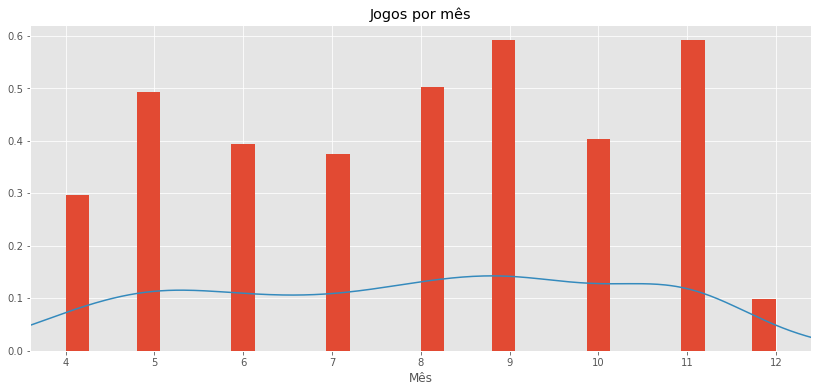

In [14]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(14, 6))

x=jogos.Mes

plt.hist(x, density=True, bins=30)
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.xlabel('Mês')
plt.title('Jogos por mês')

plt.show()

In [18]:
Local = Counter(jogos['Local'])
estadio_local = sorted(Local, key = Local.get, reverse = True)
contador_estadio = sorted(list(Local.values()), reverse = True)

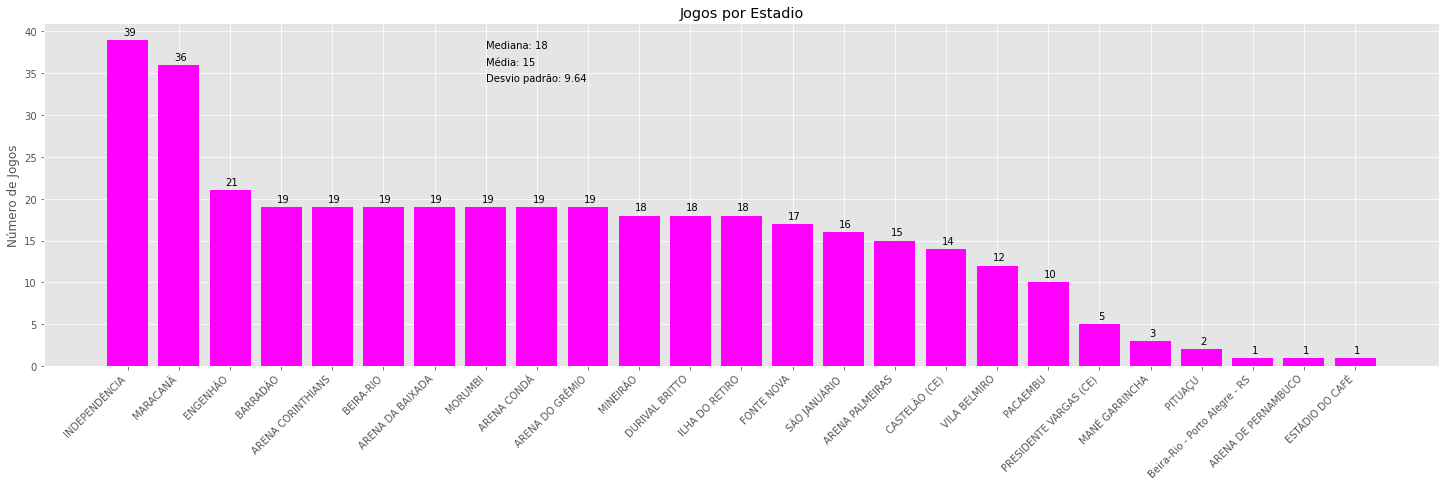

In [41]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(25, 7))

x=estadio_local
y=contador_estadio

rects1=ax.bar(x, y,color='Magenta')

ax.set_xticks(x)
fig.autofmt_xdate(rotation=45)
plt.ylabel("Número de Jogos")
plt.title('Jogos por Estadio')
plt.text(7, 38, 'Mediana: %d'%(np.median(np.array(contador_estadio))))
plt.text(7, 36, 'Média: %d'%(np.mean(np.array(contador_estadio))))
plt.text(7, 34, 'Desvio padrão: %.2f'%(static.stdev(contador_estadio)))   

numero_em_cima(rects1, ax)

plt.show()

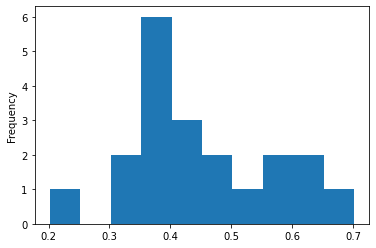

In [13]:
brazuca ['Aproveitamento'].plot(kind='hist')
plt.show()

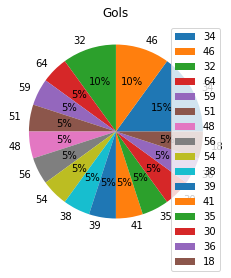

In [14]:
cyl_frequency = brazuca['Gols pró'].value_counts()

plt.pie(cyl_frequency, labels = cyl_frequency.index, autopct='%1.i%%')

plt.legend()

plt.title('Gols')

plt.show()

===========================================================================================================

##### contando quantas vezes o nome do atleta aparece com o nome de um time podemos saber quantos gols cada atleta fez por clube.

In [38]:
atleta = Counter(gols['atleta'])
clube = sorted(atleta, key = atleta.get, reverse = True)
contador_clube = sorted(list(atleta.values()), reverse = True)

##### vamos vericar melhor com um grafico.

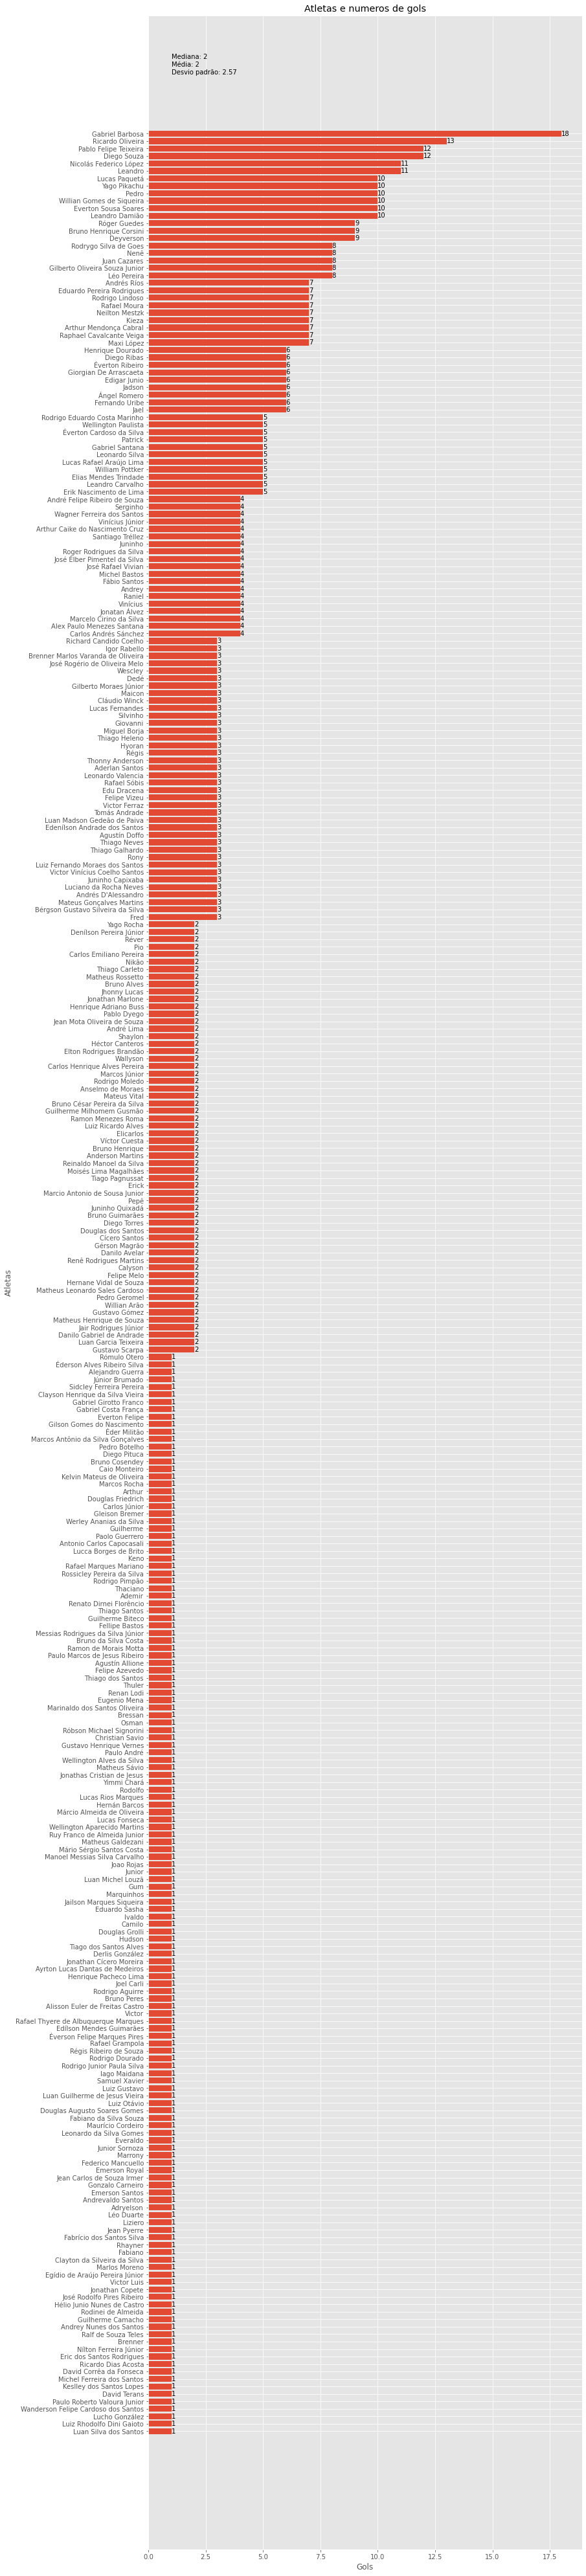

In [45]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(12, 72))

x=clube
y=contador_clube

rects1=ax.barh(x, y)

for i, v in enumerate(y):
    ax.text(v + 0, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel("Gols")
plt.ylabel('Atletas')
plt.title('Atletas e numeros de gols')
plt.text(1, -10, 'Mediana: %d'%(np.median(np.array(contador_clube))))
plt.text(1, -9, 'Média: %d'%(np.mean(np.array(contador_clube))))
plt.text(1, -8, 'Desvio padrão: %.2f'%(static.stdev(contador_clube)))
plt.show()

Artilheiro: Gabriel Barbosa do Santos (lembrando que esses dados são do campeonato brasileiro de 2018, nesse ano o Gabriel jogava no Santos)

========================================================================================

#### Agora vamos ver quantos gols cada clube fez, para isso vamos somar quantas vezes o nome de um clube aparece em um atleta.

In [57]:
clube = Counter(gols['clube'])
atleta = sorted(clube, key = clube.get, reverse = True)
contador_atleta = sorted(list(clube.values()), reverse = True)

#### Vamos verificar melhor em um grafico

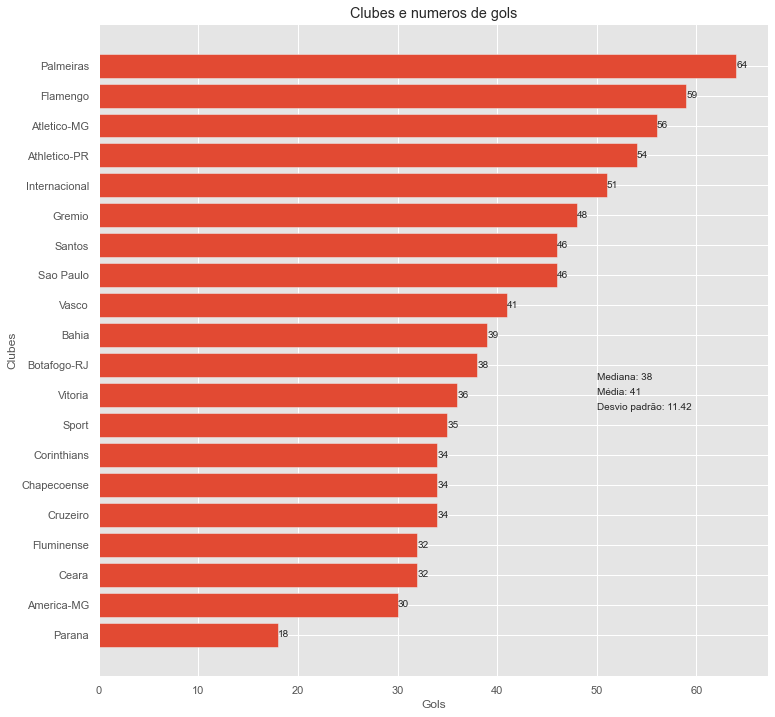

In [59]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(12, 12))

x=atleta
y=contador_atleta

rects1=ax.barh(x, y)

for i, v in enumerate(y):
    ax.text(v + 0, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel("Gols")
plt.ylabel('Clubes')
plt.title('Clubes e numeros de gols')
plt.text(50, 10.5, 'Mediana: %d'%(np.median(np.array(contador_atleta))))
plt.text(50, 11.0, 'Média: %d'%(np.mean(np.array(contador_atleta))))
plt.text(50, 11.5, 'Desvio padrão: %.2f'%(static.stdev(contador_atleta)))
plt.show()

##### No grafico a cima podemos observar que o Palmeiras foi o clube com o maior saldo de gols e o parana teve o menor saldo, Então podemos dizer que o Palmeiras teve o melhor ataque e o Parana o pior.

==========================================================================================

##### No grafico a baixo podemos ver uma porcentagem de gols por clube.

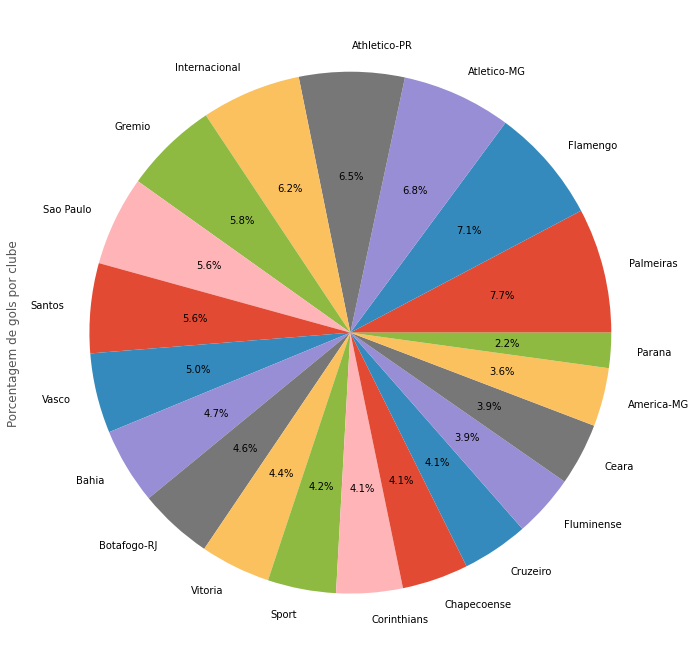

In [13]:
plt.style.use("ggplot")

gols['clube'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label="Porcentagem de gols por clube" ,figsize=(12, 12))
plt.show()

#### Quantidade de clubes por estado.

In [196]:
uf = Counter(dados['uf'])
time = sorted(uf, key = uf.get, reverse = True)
contador_time = sorted(list(uf.values()), reverse = True)

##### Visualizando em um grafico.

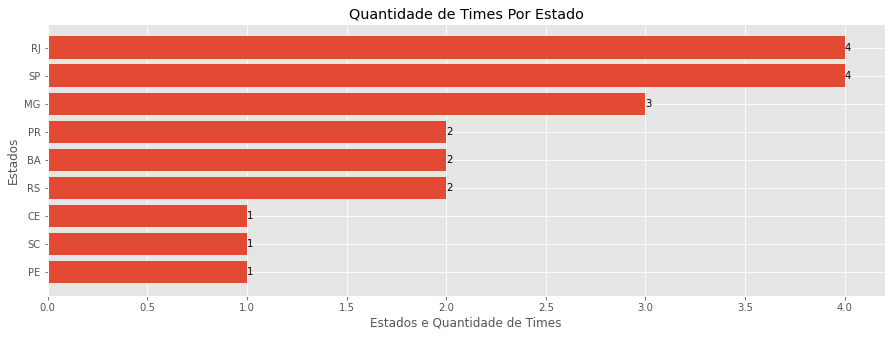

In [197]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(15, 5))

x=time
y=contador_time

rects1=ax.barh(x, y)

for i, v in enumerate(y):
    ax.text(v + 0, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel("Estados e Quantidade de Times")
plt.title('Quantidade de Times Por Estado')
plt.ylabel('Estados')
plt.show()

=====================================================================================================

#### Times e estados

In [32]:
dados2[['Times','UF']]

,Times,UF
0,America MG,MG
1,Atletico MG,MG
2,Atletico PR,PR
3,Bahia,BA
4,Botafogo,RJ
5,Ceara,CE
6,Chapecoense,SC
7,Corinthians,SP
8,Cruzeiro,MG
9,Flamengo,RJ


==================================================================================================

### Times e pontuações até o final do campeonato

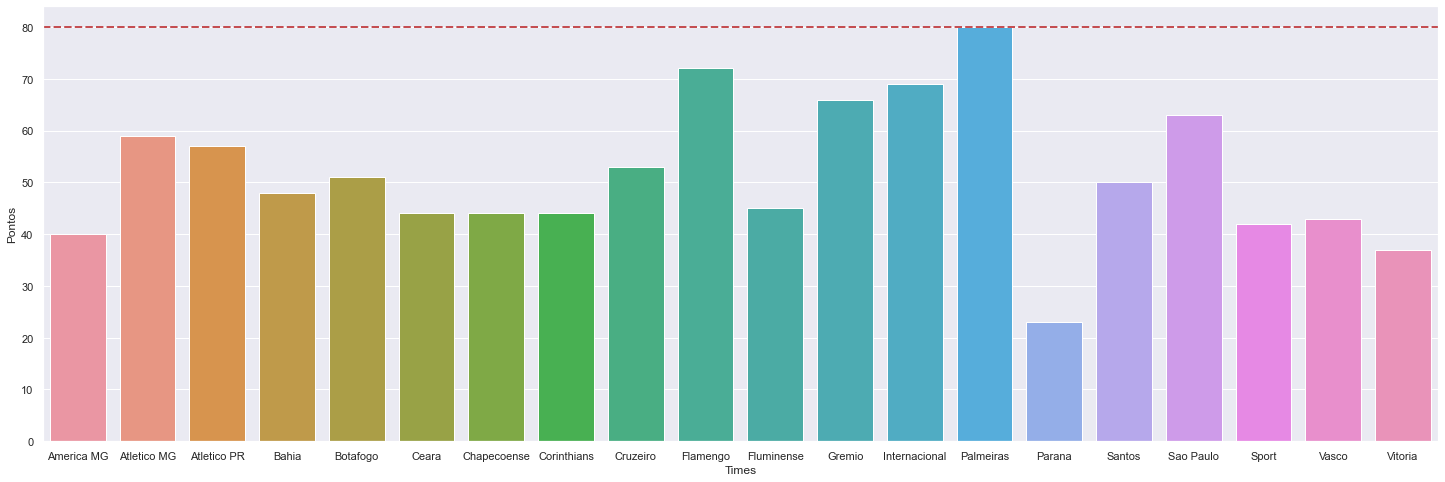

In [48]:
sns.set(rc={'figure.figsize':(25,8)})
plot = sns.barplot(data=dados2 , x='Times', y='Pontos')
plt.axhline(80,0,1, color='r',**{'ls':'--','lw':2})

### Visualizando o grafico a cima podemos ver que o Palmeiras foi o time com a maior pontuação do campeonato brasileiro de 2018, consagrando-se campeão Brasileiro.

========================================================================================================

#### Clubes rebaixados para a série B do campeonato Brasileiro 2019 (Z 4)

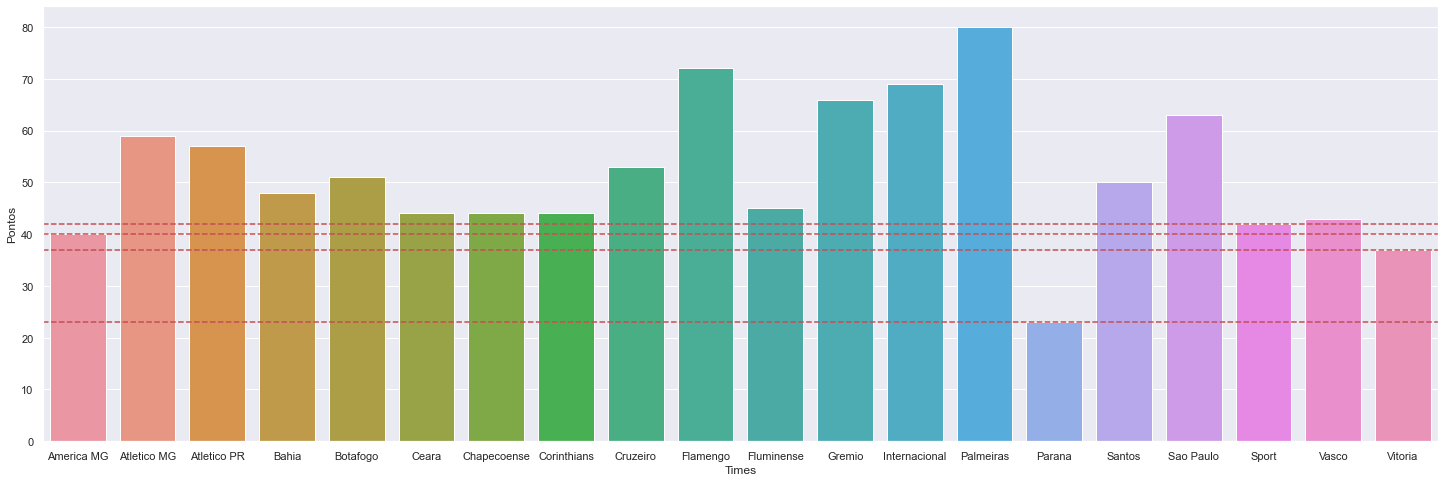

In [71]:
sns.set(rc={'figure.figsize':(25,8)})
plot = sns.barplot(data=dados2 , x='Times', y='Pontos')
plt.axhline(23,0,1, color='r',**{'ls':'--','lw':1.5})
plt.axhline(37,0,1, color='r',**{'ls':'--','lw':1.5})
plt.axhline(40,0,1, color='r',**{'ls':'--','lw':1.5})
plt.axhline(42,0,1, color='r',**{'ls':'--','lw':1.5})

##### Pela linha horizontal podemos ver que os atimes rebaixados foram: Parana com 23 pontos, Vitória com 37 pontos, América Mg com 40 pontos, e Sport com 42 pontos.

=========================================================================================================

### Times classificados para a Copa Libertadores da América (G 4)

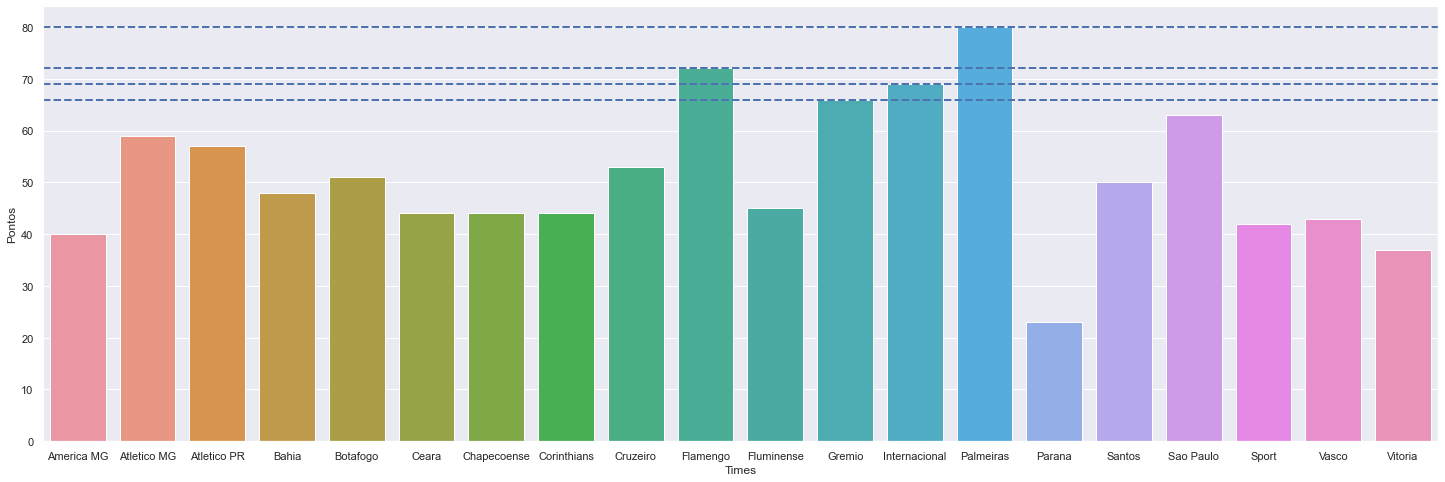

In [67]:
sns.set(rc={'figure.figsize':(25,8)})
plot = sns.barplot(data=dados2 , x='Times', y='Pontos')
plt.axhline(80,0,1, color='b',**{'ls':'--','lw':2})
plt.axhline(72,0,1, color='b',**{'ls':'--','lw':2})
plt.axhline(69,0,1, color='b',**{'ls':'--','lw':2})
plt.axhline(66,0,1, color='b',**{'ls':'--','lw':2})

##### Os times do G4 são: Palmeiras com 80 pontos, Flamengo com 72 pontos, Internacional com 69, e Grêmio com 66 pontos.

=================================================================================================================

#### Verificando qual foi o numero de vitórias, derrotas e empates dos 380 jogos. 

In [21]:
Resultado = Counter(rodada1['Resultado'])
Times = sorted(Resultado, key = Resultado.get, reverse = True)
contador_Times = sorted(list(Resultado.values()), reverse = True)

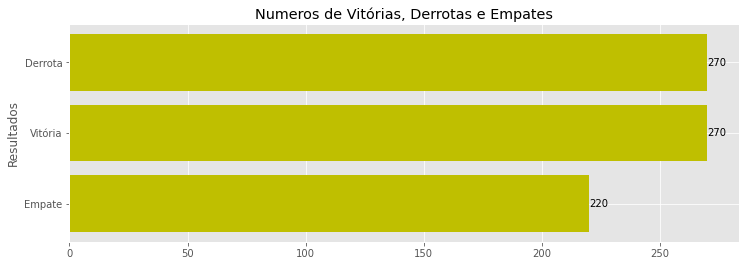

In [22]:

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(12, 4))

x=Times
y=contador_Times

rects1=ax.barh(x, y, color='y')

for i, v in enumerate(y):
    ax.text(v + 0, i, str(v),va='center')

ax.invert_yaxis()
plt.ylabel('Resultados')
plt.title('Numeros de Vitórias, Derrotas e Empates')
plt.show()

#### O numero de derrotas tem que ser identico ao numero de vitórias, pode parecer que esta errado mas os resultado de cada jogo tem que ser duplicado, um resultado para cada time, para saber se esta tudo ok é so dividir o total de empates por 2 e somar com o total de vitórias ou derrotas, vai dar 380.

===============================================================================================

#### Verificando se todos os times fizeram 38 jogos

In [310]:
Times = Counter(rodada1['Times'])
Resultado = sorted(Times, key = Times.get, reverse = True)
contador_Resultado = sorted(list(Times.values()), reverse = True)

###### contando quantas vezes os nomes dos clubes aparecem por resultado é possivel saber quantos jogos cada clube fez, como no campeonato brasileiro são 38 rodas então tem que aparecer no grafico 38 por clube.

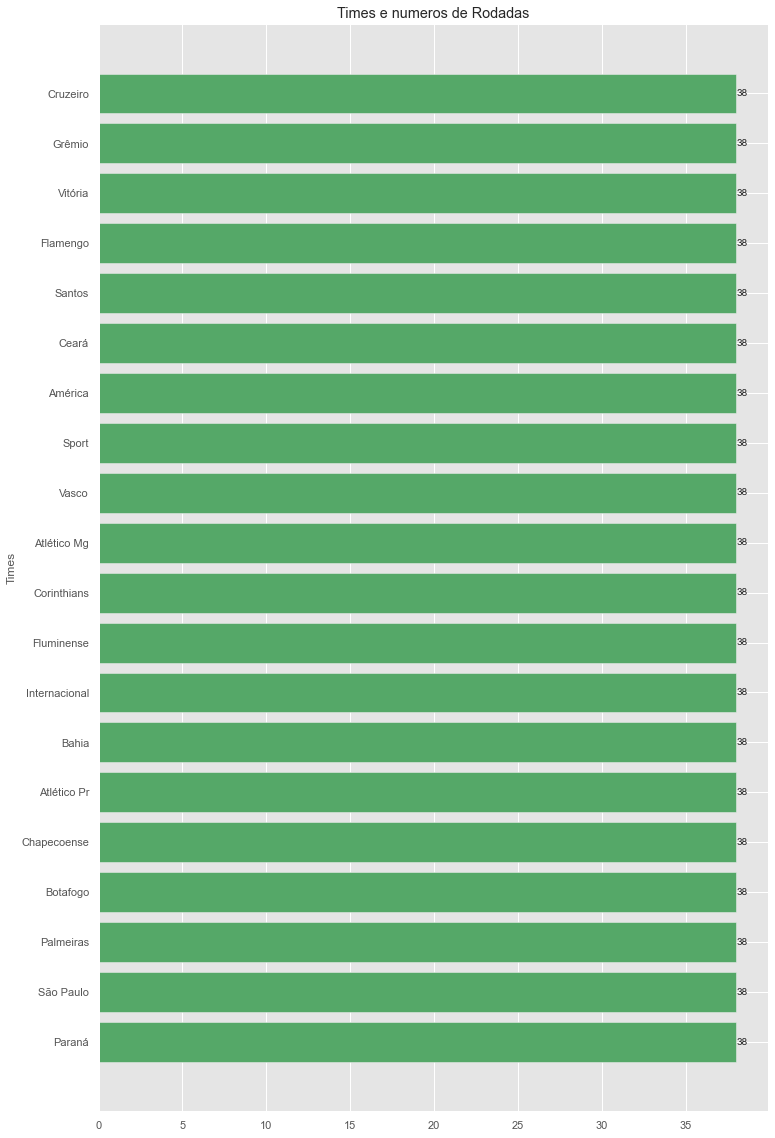

In [311]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(12, 20))

x=Resultado
y=contador_Resultado


rects1=ax.barh(x, y, color='g')

for i, v in enumerate(y):
    ax.text(v + 0, i, str(v),va='center')

ax.invert_yaxis()
plt.ylabel('Times')
plt.title('Times e numeros de Rodadas')
plt.show()

===============================================================================================

### Aqui saberemos quantos jogos foram feitos por estadio.

In [48]:
Local = Counter(rodada1['Local'])
Times = sorted(Local, key = Local.get, reverse = True)
contador_Times = sorted(list(Local.values()), reverse = True)




como o dataset tem os jogos separados linha por linha aqui foi necessario dividir o resultado do contador por 2 e usar // para o resultado ficar inteiro.

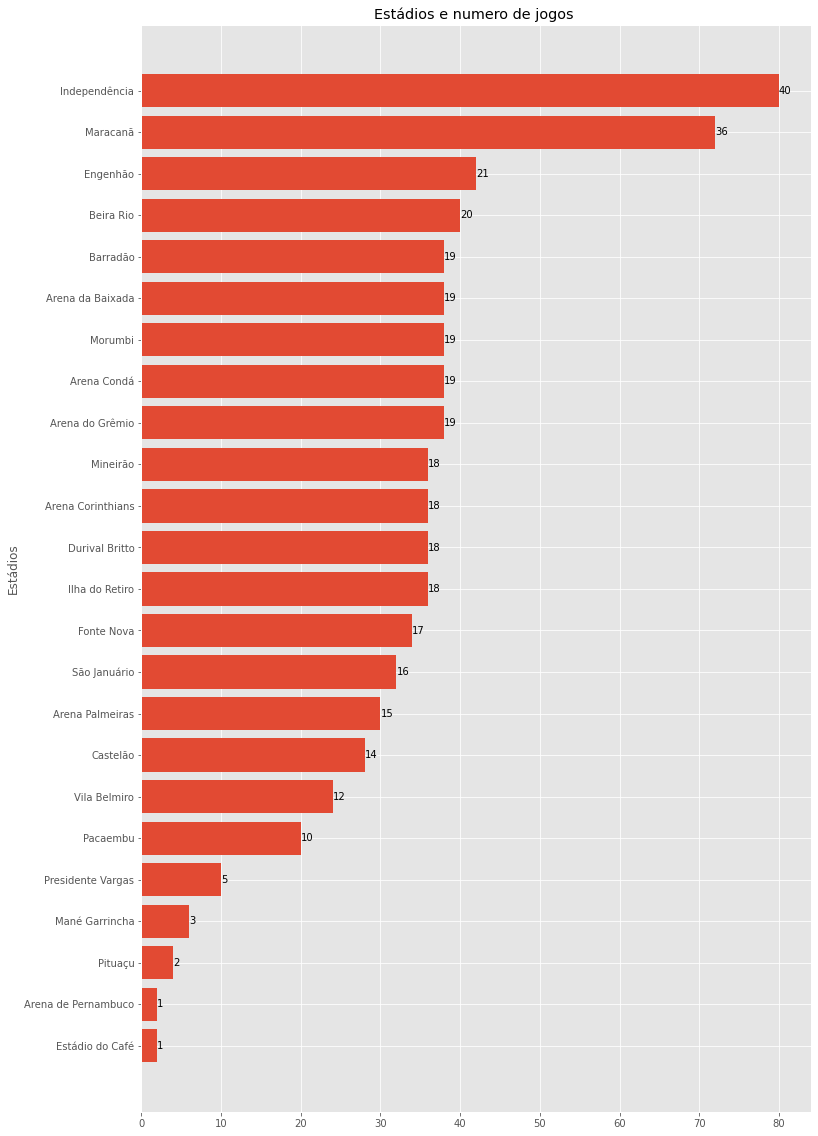

In [51]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(12, 20))

x=Times
y=contador_Times

rects1=ax.barh(x, y)

for i, v in enumerate(y):
    ax.text(v + 0, i, str(v//2),va='center')

ax.invert_yaxis()
plt.ylabel('Estádios')
plt.title('Estádios e numero de jogos ')
plt.show()

=====================================================================================================

### Gols a favor de cada time.

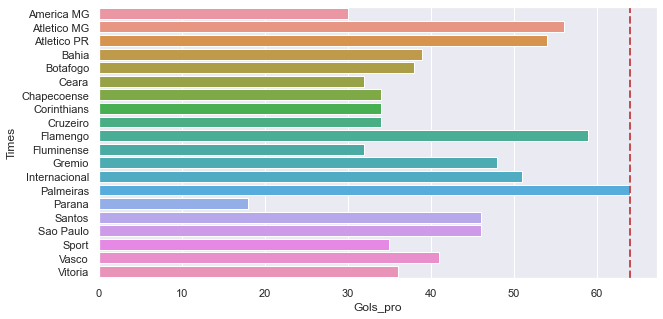

In [82]:
sns.set(rc={'figure.figsize':(10,5)})
plot = sns.barplot(data=dados2 , y='Times', x='Gols_pro')
plt.axvline(64,0,1, color='r',**{'ls':'--','lw':2})

##### passando uma linha na vertical podemos ver que o Palmeiras marcou 64 gols em toda a competição. (melhor ataque)

===================================================================================================

### Gols contra de cada clube.

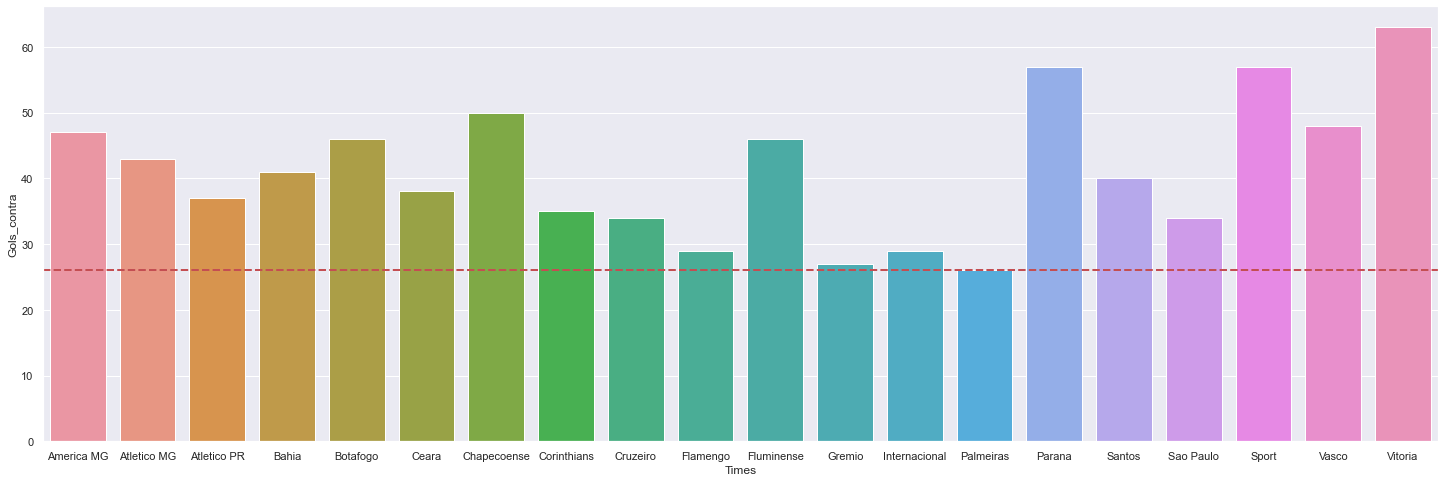

In [81]:
sns.set(rc={'figure.figsize':(25,8)})
plot = sns.barplot(data=dados2 , x='Times', y='Gols_contra')
plt.axhline(26,0,1, color='r',**{'ls':'--','lw':2})

#### No grafico podemos perceber que o Palmeiras teve o menor saldo de gols contra. (melhor defesa)

========================================================================================

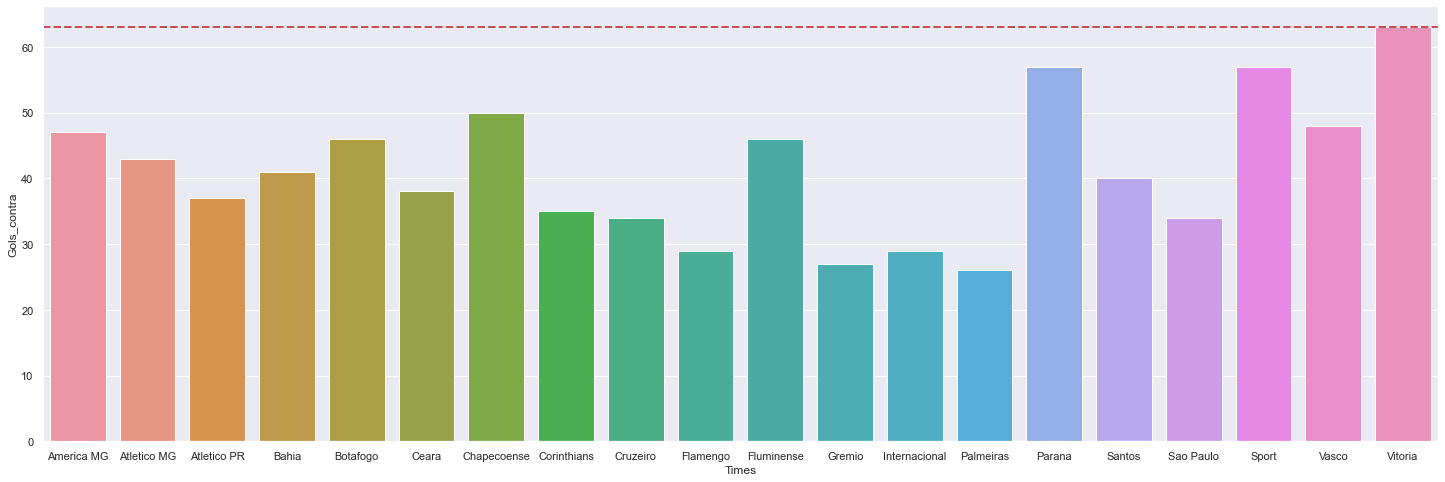

In [83]:
sns.set(rc={'figure.figsize':(25,8)})
plot = sns.barplot(data=dados2 , x='Times', y='Gols_contra')
plt.axhline(63,0,1, color='r',**{'ls':'--','lw':2})

#### Nesse aqui o Vitória aparece como o clube com o maior numero de gols sofridos. (pior defesa)

### Saldo de gols

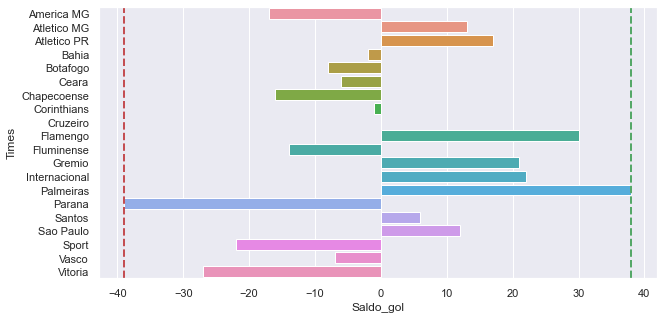

In [84]:
sns.set(rc={'figure.figsize':(10,5)})
plot = sns.barplot(data=dados2 , y='Times', x='Saldo_gol')
plt.axvline(38,0,1, color='g',**{'ls':'--','lw':2})
plt.axvline(-39,0,1, color='r',**{'ls':'--','lw':2})

##### Aqui o Palmeiras aparece com o maior saldo de gols positivo (38), o Paraná aparece com um saldo negativo (-39).

========================================================================================================

### Quebrando os dados para treino e teste

In [602]:
from sklearn.model_selection import train_test_split

rodada1['Resultado'] = rodada1['Resultado'].replace('Vitória', 0)
rodada1['Resultado'] = rodada1['Resultado'].replace('Derrota', 1)
rodada1['Resultado'] = rodada1['Resultado'].replace('Empate', 2)

rodada1['Times'] = rodada1['Times'].replace('Cruzeiro', 0)
rodada1['Times'] = rodada1['Times'].replace('Grêmio', 1)
rodada1['Times'] = rodada1['Times'].replace('Vitória', 2)
rodada1['Times'] = rodada1['Times'].replace('Flamengo', 3)
rodada1['Times'] = rodada1['Times'].replace('Santos', 4)
rodada1['Times'] = rodada1['Times'].replace('Ceará', 5)
rodada1['Times'] = rodada1['Times'].replace('América', 6)
rodada1['Times'] = rodada1['Times'].replace('Sport', 7)
rodada1['Times'] = rodada1['Times'].replace('Vasco', 8)
rodada1['Times'] = rodada1['Times'].replace('Atlético Mg', 9)
rodada1['Times'] = rodada1['Times'].replace('Corinthians', 10)
rodada1['Times'] = rodada1['Times'].replace('Fluminense', 11)
rodada1['Times'] = rodada1['Times'].replace('Internacional', 12)
rodada1['Times'] = rodada1['Times'].replace('Bahia', 13)
rodada1['Times'] = rodada1['Times'].replace('Atlético Pr', 14)
rodada1['Times'] = rodada1['Times'].replace('Chapecoense', 15)
rodada1['Times'] = rodada1['Times'].replace('Botafogo', 16)
rodada1['Times'] = rodada1['Times'].replace('Palmeiras', 17)
rodada1['Times'] = rodada1['Times'].replace('São Paulo', 18)
rodada1['Times'] = rodada1['Times'].replace('Paraná', 19)


y = rodada1['gol']
x = rodada1.drop(["Rodada", "Jogo","gol","Local"], axis = 1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 2)
print(rodada1.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)



(760, 6) (758, 2) (2, 2) (758,) (2,)


In [603]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

In [604]:
logreg_model = LinearRegression()

In [605]:
logreg_model.fit(x_treino, y_treino)

LinearRegression()

In [606]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = logreg_model.predict(x_teste)

print(f"MSE de Teste: {mean_squared_error(y_teste, y_pred):1.1f}")
print('\n ---------------------------\n')
print(f"MAE de Teste: {mean_absolute_error(y_teste, y_pred):1.1f}")

MSE de Teste: 1.3

 ---------------------------

MAE de Teste: 0.8


In [607]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(n_jobs=-1, random_state=123)

In [608]:
clf.fit(x_treino, y_treino)

LogisticRegression(n_jobs=-1, random_state=123)

In [609]:
from sklearn.metrics import accuracy_score

y_treino_true = y_treino
y_treino_pred = clf.predict(x_treino)
y_teste_true = y_teste
y_teste_pred = clf.predict(x_teste)


print(f"Acurácia de Treino: {round(accuracy_score(y_treino_true, y_treino_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_teste_true, y_teste_pred), 2)}")

Acurácia de Treino: 0.35

 ---------------------------

Acurácia de Teste: 0.5


============================================================================

In [106]:
import statsmodels.api as sm

X = dados2['Gols_pro']
y = dados2['Saldo_gol']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Saldo_gol   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     96.19
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.20e-08
Time:                        18:38:23   Log-Likelihood:                -69.221
No. Observations:                  20   AIC:                             142.4
Df Residuals:                      18   BIC:                             144.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.2021      6.990     -9.470      0.0

==========================================================================================================

### Regressão Linear

In [107]:
dataframe = pd.DataFrame()
dataframe['x'] = dados2['Gols_pro']
dataframe['y'] = dados2['Saldo_gol']
x_values = dataframe[['x']]
y_values = dataframe[['y']]

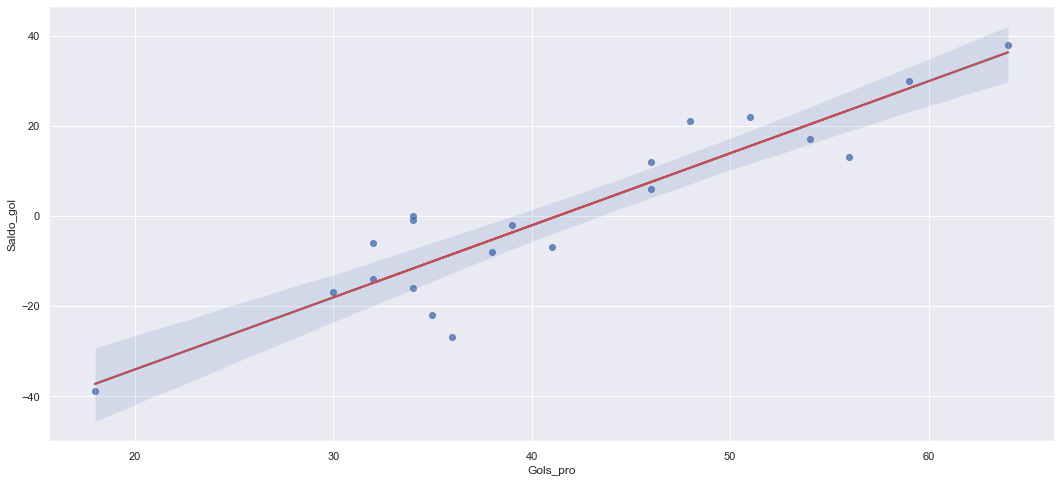

In [108]:
plt.figure(figsize=(18,8))
sns.regplot(x='Gols_pro', y='Saldo_gol', data=dados2)
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)
plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r')
plt.show()